# 1. LOAD LIBRARIES

load the diffrent libraries needed

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm


from collections import Counter
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

# 2. LOAD + CHECK DATA  

## 2.1. load the data from csv into a dataframe

In [337]:
df = pd.read_csv("fifa21_male2.csv")

## 2.2. check the first rows of the dataframe 

In [338]:
df.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

## 2.3. check the shape and the types of the dataframe 

In [339]:
df.shape

(17125, 107)

In [340]:
df.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                int64  
 1   Name              object 
 2   Age               int64  
 3   OVA               int64  
 4   Nationality       object 
 5   Club              object 
 6   BOV               int64  
 7   BP                object 
 8   Position          object 
 9   Player Photo      object 
 10  Club Logo         object 
 11  Flag Photo        object 
 12  POT               int64  
 13  Team & Contract   object 
 14  Height            object 
 15  Weight            object 
 16  foot              object 
 17  Growth            int64  
 18  Joined            object 
 19  Loan Date End     object 
 20  Value             object 
 21  Wage              object 
 22  Release Clause    object 
 23  Contract          object 
 24  Attacking         int64  
 25  Crossing          int64  
 26  Finishing        

# 3. CLEANING DATA

## 3.1. standardize column names

lower the strings and replace a space with an underline 

In [341]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

## 3.2. dealing with the NaN values


1) check the missing values 

In [342]:
def nan_counts(df):
    for col in df.columns:
        print(f"{col} : {df[col].isnull().sum()}")
null_counts(df)

id : 0
name : 0
age : 0
ova : 0
nationality : 0
club : 23
bov : 0
bp : 0
position : 413
player_photo : 0
club_logo : 23
flag_photo : 0
pot : 0
team_&_contract : 0
height : 0
weight : 0
foot : 0
growth : 0
joined : 58
loan_date_end : 16215
value : 0
wage : 0
release_clause : 0
contract : 0
attacking : 0
crossing : 0
finishing : 0
heading_accuracy : 0
short_passing : 0
volleys : 58
skill : 0
dribbling : 0
curve : 58
fk_accuracy : 0
long_passing : 0
ball_control : 0
movement : 0
acceleration : 0
sprint_speed : 0
agility : 58
reactions : 0
balance : 58
power : 0
shot_power : 0
jumping : 58
stamina : 0
strength : 0
long_shots : 0
mentality : 0
aggression : 0
interceptions : 7
positioning : 7
vision : 58
penalties : 0
composure : 423
defending : 0
marking : 0
standing_tackle : 0
sliding_tackle : 58
goalkeeping : 0
gk_diving : 0
gk_handling : 0
gk_kicking : 0
gk_positioning : 0
gk_reflexes : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 89
d/w : 89
ir : 0
pac : 0
sho : 0
pas : 0
dri :

2) replace null values with the most freuqent value 
OR 
2) replace null values with the mean of the column  

In [343]:
replace_by_most = df.loc[:, ['position','club','a/w','d/w']]
for i in replace_by_most.columns:
    df[i].fillna("df.position.value_counts().head(1)", inplace = True) 

In [344]:
replace_by_mean = df.loc[:, ['volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'sliding_tackle' ]]
for i in replace_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

## 3.3. clean and configure values for analysis

**weight column** contains strings - calculation not possible  
1) drop the string values 2) convert the values to float 3) store values in new column "weight_num"

In [345]:
df['weight_kg'] = df['weight'].str.replace('lbs', '')
df['weight_kg'] = df['weight_kg'].apply(lambda x: int(x))*0.4535
df['weight_kg'].head()

0    82.0835
1    64.8505
2    73.0135
3    74.8275
4    68.0250
Name: weight_kg, dtype: float64

**height column** contains feet object values - calculation not possible 
1) replace the feet values with cm values, 2) store the values in a new column "height_cm"

In [346]:
df['height'] = df['height'].astype(str)

In [347]:
df['height_cm'] = df["height"].replace(['6\'0"', '5\'10"', '5\'9"', '5\'11"', '5\'7"', '5\'8"', '6\'2"', '6\'4"',
'6\'3"', '5\'6"', '6\'1"', '6\'6"', '5\'5"', '6\'5"', '6\'8"', '6\'7"', '5\'2"', '5\'4"', '5\'3"', '6\'9"',
'5\'1"'],["182.88", "177.80", "175.26", "180.34", "170.18", "172.72", "187.96", "193.04", "190.50", "167.64", "185.42", 
          "198.12", "165.10", "195.58", "203.20", "200.66", "157.48", "162.56", "160.02", "205.74", "154.94"])

In [348]:
df['height_cm'] = df['height_cm'].astype(float)

converting the string **height_cm** values in float values  

In [349]:
df['height_cm'] = df['height_cm'].astype(float)
df['height_cm'].head()

0    182.88
1    177.80
2    175.26
3    180.34
4    170.18
Name: height_cm, dtype: float64

calculation with the **value and wage column** not possible, because they contains strings

1) drop the strings 2) multiplier the values by the meanings of the strings (example M = 000000) 3) store the result in new columns "value_num" + "wage_num"

In [350]:
def money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 1e6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 1e9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 1e3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

In [351]:
df['value_num'] = df['value'].apply(money)
df['wage_num'] = df['wage'].apply(money)
df[['value_num', 'wage_num']].head()

value_num  wage_num
0   625000.0    7000.0
1   600000.0    7000.0
2  1100000.0   15000.0
3        0.0       0.0
4  5500000.0   12000.0

in the **nationality column** are players from DR Congo and Congo. I replace DR Congo with Congo. 

In [352]:
 df['nationality'] = df['nationality'].replace(['DR Congo'], 'Congo')

store the year from the **joined column** in a new column **joined_year**

In [353]:
df['joined'] = pd.to_datetime(df['joined'])
df['joined_year'] = df['joined'].dt.strftime('%Y')

store the duration from the **contract column** in a new **column contract_num**

In [354]:
def contract_num(x):
  years = [int(i) for i in x.split() if i.isdigit()]
  if (('loan') not in str(x).lower()):
    if len(years) == 2: 
      x = years[1] - years[0]
      return int(x)
    elif len(years) == 1: 
      x = 1 
    else: 
      return 0
  else: 
    return 0
df['contract_num'] = df['contract'].apply(contract_num)

replace the null values with the mean of the **column contract_num**

In [355]:
replace_by_mean = df.loc[:, ['contract_num']]
for i in replace_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

## 3.4. droping columns

drop the columns with 

1) too much missing values (loan_date_end 16215, composure) 

2) not relevant values (player_photo, club_logo, flag_photo, 'ls', 'st', 'cf', 'rm', 'rs', 'lw', 'lf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',  'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk') for the analysis

3) the one we configure and store new (joined, weight, height, value, wage, contract)

4) not very much variation in the column ("finishing", "crossing", "volleys", "curve", "fk_accuracy", "long_shots", "agression", "interceptions", "gender")

In [356]:
df.drop(['team_&_contract',"finishing", "crossing", "volleys", "curve", "fk_accuracy", "long_shots", "aggression", "interceptions"
, 'release_clause', 'ir', 'w/f', 'sm', 'gender', 'composure', 'loan_date_end', 'player_photo', 'club_logo', 'flag_photo', 'joined', 
'weight', 'height', 'value', 'wage', 'contract', 'ls', 'st', 'cf', 'rm', 'rs', 'lw', 'lf', 'rf', 'rw', 'lam', 'cam',
'ram', 'lm', 'lcm', 'cm', 'rcm',  'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1, inplace=True)

In [357]:
df.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

                             position  pot   foot  growth  attacking  \
0                                  LM   69   Left       0        313   
1                          CM CAM CDM   71  Right       0        337   
2                        CAM RM RW LM   71  Right       0        337   
3  df.position.value_counts().head(1)   82  Right      14        264   
4                              CM CAM   81  Right       0        367   

   heading_accuracy  short_passing  skill  dribbling  long_passing  \
0                59             71    338         73            69   
1                61             76    369         69            71   
2                41             77    387         79            69   
3                60             80    255         68            64   
4                54             90    408         85            83   

   ball_control  movement  acceleration  sprint_speed    agility  reactions  \
0            71       347            68            74  68.000000         69   
1            71       305            56            50  62.000000         65   
2            78       295            48            42  71.000000         59   
3            77       176            59            62  64.602273         55   
4            90       346            61            56  79.000000         75   

     balance  power  shot_power    jumping  stamina  strength  mentality  \
0  68.000000    347          74  68.000000       69        68        320   
1  72.000000    324          75  54.000000       64        60        362   
2  75.000000    284          72  58.000000       29        56        317   
3  64.715591    239          63  65.170212       51        66        271   
4  75.000000    297          67  40.000000       58        62        370   

   positioning     vision  penalties  defending  marking  standing_tackle  \
0         63.0  66.000000         50        208       70               69   
1         72.0  73.000000         75        153       70               43   
2         69.0  74.000000         66         99       35               34   
3         72.0  55.443605         70         75       34               41   
4         78.0  93.000000         71        181       68               57   

   sliding_tackle  goalkeeping  gk_diving  gk_handling  gk_kicking  \
0       69.000000           56         14            5          15   
1       40.000000           56          9           12          13   
2       30.000000           51          9            6          13   
3       46.099725           68          5           21          64   
4       56.000000           45          6           13           6   

   gk_positioning  gk_reflexes  total_stats  base_stats  \
0              10           12         1929         408   
1              11           11         1906         385   
2              16            7         1770         354   
3              21           21         1348         369   
4              13            7         2014         420   

                                  a/w                                 d/w  \
0                              Medium                                High   
1                              Medium                              Medium   
2                              Medium                                 Low   
3  df.position.value_counts().head(1)  df.position.value_counts().head(1)   
4                                High                              Medium   

   pac  sho  pas  dri  def  phy hi

In [358]:
df.shape

(17125, 61)

# 4. QUESTION 1 HEIGHT x WEIGHT

**How big is the correlation between the hight and the weight of the players?**


## 4.1. check out some statistic values from both parameters 

In [359]:
def get_statistics(numeric_column_name):
    print("Mean: ".format(numeric_column_name),   round(df[numeric_column_name].mean(), 2))
    print("Maximum: ".format(numeric_column_name), round(df[numeric_column_name].max(), 2))
    print("Minimum: ".format(numeric_column_name), round(df[numeric_column_name].min(), 2))
    print("Standard Deviation: ".format(numeric_column_name), round(df[numeric_column_name].std(), 2))
    
get_statistics('height_cm')

Mean:  181.22
Maximum:  205.74
Minimum:  154.94
Standard Deviation:  6.89


In [360]:
get_statistics('weight_kg')

Mean:  75.13
Maximum:  110.2
Minimum:  49.89
Standard Deviation:  7.17


## 4.2. check out the distribution of the height and the weight

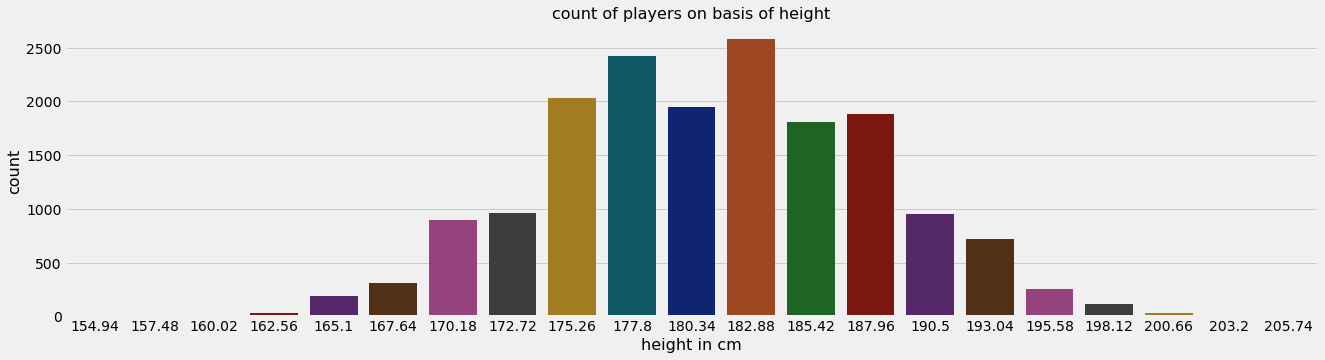

In [361]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'height_cm', data = df, palette = 'dark')
ax.set_title(label = 'count of players on basis of height', fontsize = 16)
ax.set_xlabel(xlabel = 'height in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'count', fontsize = 16)
plt.show()

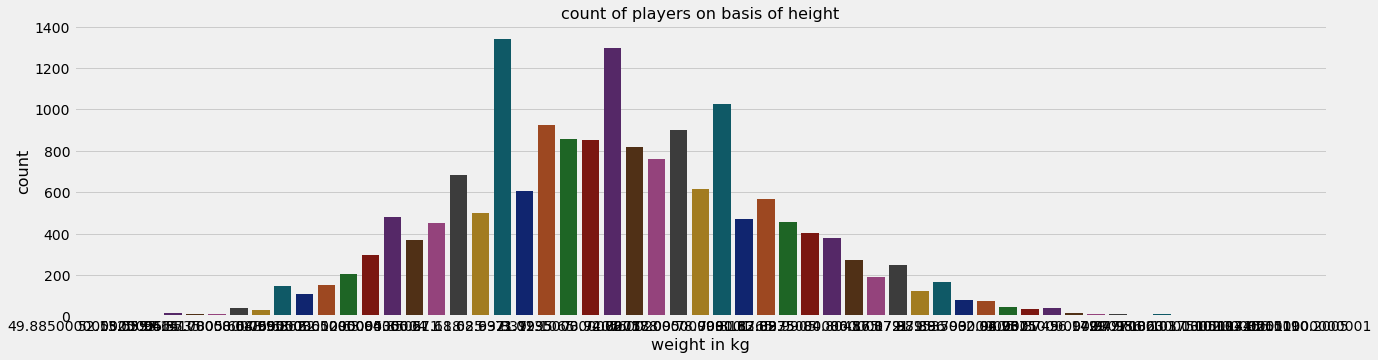

In [362]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'weight_kg', data = df, palette = 'dark')
ax.set_title(label = 'count of players on basis of height', fontsize = 16)
ax.set_xlabel(xlabel = 'weight in kg', fontsize = 16)
ax.set_ylabel(ylabel = 'count', fontsize = 16)
plt.show()

## 4.3. check the correlation between height + weight

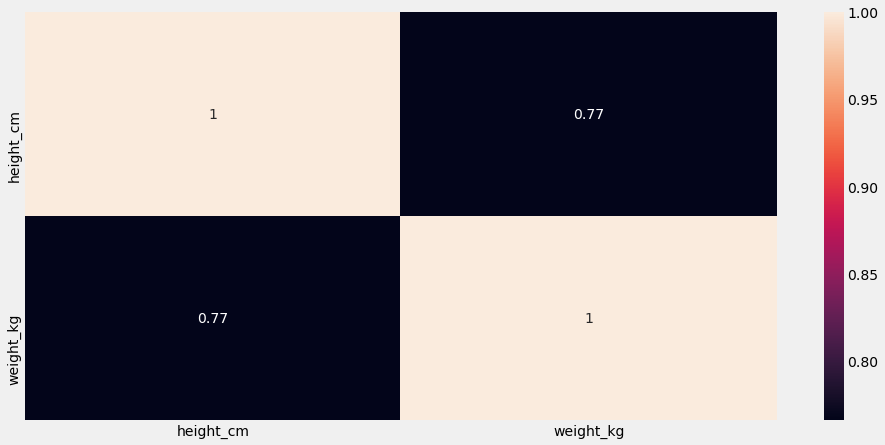

In [363]:
num_columns = df[['height_cm', 'weight_kg']]
sns.heatmap(num_columns.corr(), annot=True)
plt.show()

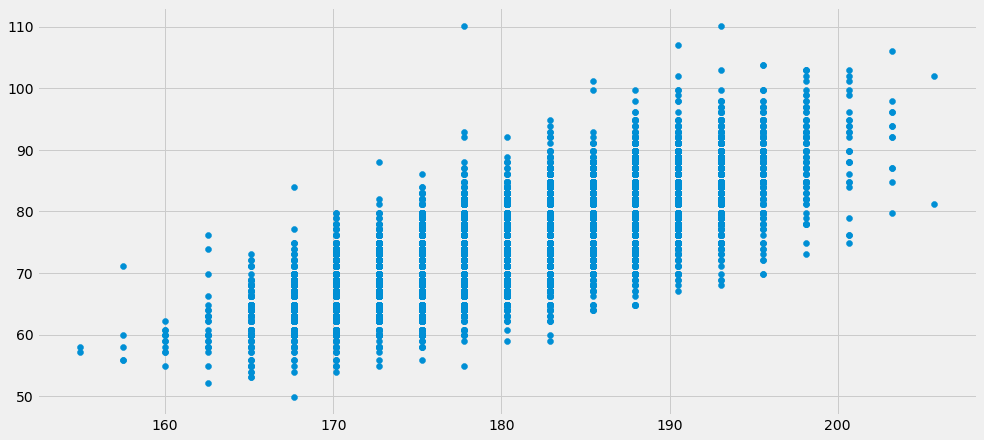

In [364]:
x = df['height_cm']
y = df['weight_kg']
ax.set_xlabel(xlabel = 'weight in kg', fontsize = 16)
ax.set_ylabel(ylabel = 'count', fontsize = 16)
plt.scatter(x, y) 
plt.show()

**Answer 1:** There is a high correlation (0,77) between the height and the weight of the fifa players

# 5. QUESTION 2 MARKETING VALUE x NATIONALITY

**Are the most frequent nationalities the ones with the biggest success (by mean marketing value)?**

## 5.1. filter the ten most frequent nationalities + put them into a dataframe 

In [365]:
top_country = df.nationality.value_counts().head(10).rename_axis('country').reset_index()
pd.DataFrame(top_country)

country  nationality
0        England         1707
1        Germany         1154
2          Spain         1121
3         France          990
4         Brazil          857
5      Argentina          778
6          Italy          565
7    Netherlands          475
8       Portugal          365
9  United States          358

## 5.2. check the distribution of the most common nationalities 

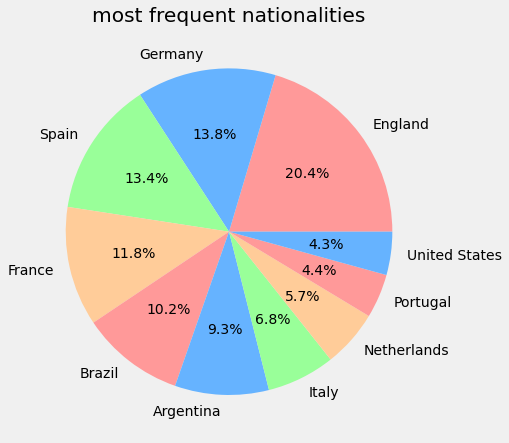

In [366]:
plt.style.use('fivethirtyeight')
x = top_country['nationality']
label = top_country["country"]
plt.title("most frequent nationalities")
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x, radius=1, labels=label, autopct='%1.1f%%', colors=colors)
#ax.pie(..., radius=1800, frame=True)
plt.show()


the pie plot shows that out of the ten most frequent nationalities 20,4% of he players are from England and only 4,3% are from United States

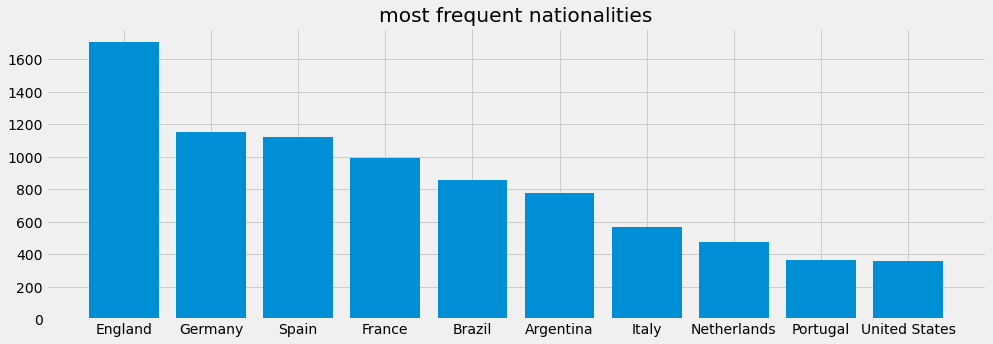

In [367]:

plt.figure(figsize = (15, 5))
bar_plot = dict(Counter(df['nationality'].values).most_common(10))
plt.bar(*zip(*bar_plot.items()))
plt.title("most frequent nationalities")
plt.show()

## 5.3. check the distribution of the marketing value from the different nationalities

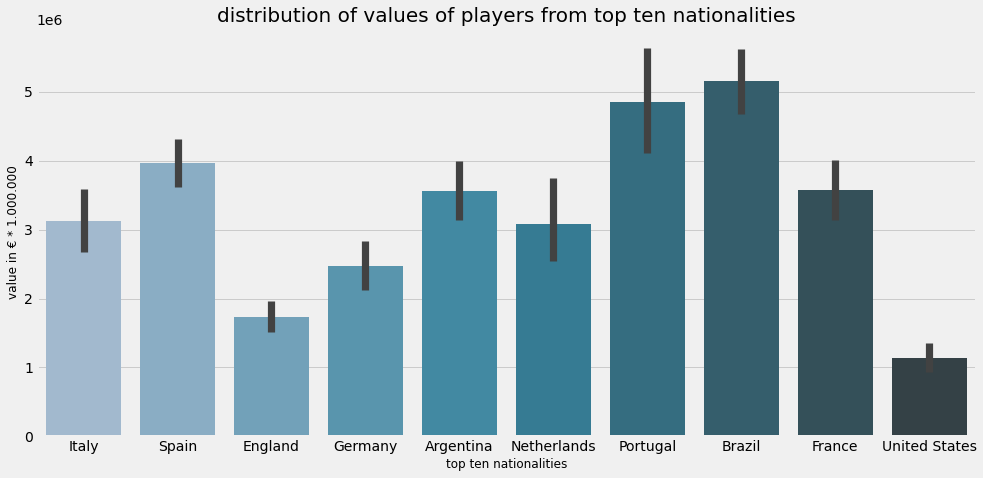

In [368]:
countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Netherlands', 'Portugal', 'United States')
data_country= df.loc[df['nationality'].isin(countries) & df['value_num']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_country['nationality'], y = data_country['value_num'], palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'top ten nationalities', fontsize = 12)
ax.set_ylabel(ylabel = 'value in € * 1.000.000', fontsize = 12)
ax.set_title(label = 'distribution of values of players from top ten nationalities', fontsize = 20)
plt.show()

the three players with the highest value from the top ten most frequent nationalities are from France, Brazil and Spain

In [369]:
df2 = df.sort_values(by=['value_num'],  ascending = False)
df2.iloc[:3] 

id          name  age  ova nationality                 club  bov  \
9331  231747     K. Mbappé   21   90      France  Paris Saint-Germain   91   
2650  190871     Neymar Jr   28   91      Brazil  Paris Saint-Germain   91   
2871  192985  K. De Bruyne   29   91     Belgium      Manchester City   91   

       bp  position  pot   foot  growth  attacking  heading_accuracy  \
9331   ST  ST LW RW   95  Right       5        408                73   
2650   LW    LW CAM   91  Right       0        408                62   
2871  CAM    CAM CM   91  Right       0        407                55   

      short_passing  skill  dribbling  long_passing  ball_control  movement  \
9331             83    394         92            70            90       458   
2650             87    448         95            81            95       453   
2871             94    441         88            93            92       398   

      acceleration  sprint_speed  agility  reactions  balance  power  \
9331            96            96     92.0         92     82.0    404   
2650            94            89     96.0         91     83.0    357   
2871            77            76     78.0         91     76.0    408   

      shot_power  jumping  stamina  strength  mentality  positioning  vision  \
9331          86     77.0       86        76        341         91.0    80.0   
2650          80     62.0       81        50        356         87.0    90.0   
2871          91     63.0       89        74        408         88.0    94.0   

      penalties  defending  marking  standing_tackle  sliding_tackle  \
9331         70        100       34               34            32.0   
2650         92         94       35               30            29.0   
2871         84        186       68               65            53.0   

      goalkeeping  gk_diving  gk_handling  gk_kicking  gk_positioning  \
9331           42         13            5           7              11   
2650           59          9            9          15              15   
2871           56         15           13           5              10   

      gk_reflexes  total_stats  base_stats   a/w     d/w  pac  sho  pas  dri  \
9331            6         2147         466  High     Low   96   86   78   91   
2650           11         2175         451  High  Medium   91   85   86   94   
2871           13         2304         485  High    High   76   86   93   88   

      def  phy  hits  weight_kg  height_cm    value_num  wage_num joined_year  \
9331   39   76  1.2K    73.0135     177.80  105500000.0  160000.0        2018   
2650   36   59   546    68.0250     175.26   90000000.0  270000.0        2017   
2871   64   78   406    69.8390     180.34   87000000.0  370000.0        2015   

      contract_num  
9331           4.0  
2650           5.0  
2871           8.0

the three players with the highest market value are from France, Bazil and Belgium

**Answer 2:** The value is not inextricably linked with the frequency. Brazil makes up only 10,2% of the top ten nationalities, but is the nationalty with the highest mean marketing value out of the ten most frequent nationality. Out of the total nationalities there are 2 out of the ten most frequent, but one is from less frequent nationalities (Belgium). 

# 6. VISUALIZATION + EXPLORATION

## 6.1. drop more columns

from my point of view the columns are not as relevant as the others and so it makes the data set easier to handle

In [370]:
df_num = pd.DataFrame(df.select_dtypes(include = np.number).drop(['pac', "sho", "pas", "dri", "def", "phy", "positioning", "vision", 
"penalties", "defending", "marking", "standing_tackle", "sliding_tackle", "goalkeeping", "gk_diving", "gk_handling", 
"gk_kicking", "gk_positioning", "gk_reflexes", "total_stats", "base_stats"], axis=1))


## 6.2. check the frist rows, shape, distribution plots + statistics 

In [371]:
df_num = pd.DataFrame(df.select_dtypes(include = np.number))
df_num.head()

id  age  ova  bov  pot  growth  attacking  heading_accuracy  short_passing  \
0   2   33   69   71   69       0        313                59             71   
1  16   37   71   70   71       0        337                61             76   
2  27   33   71   71   71       0        337                41             77   
3  36   36   68   70   82      14        264                60             80   
4  41   36   81   82   81       0        367                54             90   

   skill  dribbling  long_passing  ball_control  movement  acceleration  \
0    338         73            69            71       347            68   
1    369         69            71            71       305            56   
2    387         79            69            78       295            48   
3    255         68            64            77       176            59   
4    408         85            83            90       346            61   

   sprint_speed    agility  reactions    balance  power  shot_power  \
0            74  68.000000         69  68.000000    347          74   
1            50  62.000000         65  72.000000    324          75   
2            42  71.000000         59  75.000000    284          72   
3            62  64.602273         55  64.715591    239          63   
4            56  79.000000         75  75.000000    297          67   

     jumping  stamina  strength  mentality  positioning     vision  penalties  \
0  68.000000       69        68        320         63.0  66.000000         50   
1  54.000000       64        60        362         72.0  73.000000         75   
2  58.000000       29        56        317         69.0  74.000000         66   
3  65.170212       51        66        271         72.0  55.443605         70   
4  40.000000       58        62        370         78.0  93.000000         71   

   defending  marking  standing_tackle  sliding_tackle  goalkeeping  \
0        208       70               69       69.000000           56   
1        153       70               43       40.000000           56   
2         99       35               34       30.000000           51   
3         75       34               41       46.099725           68   
4        181       68               57       56.000000           45   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  \
0         14            5          15              10           12   
1          9           12          13              11           11   
2          9            6          13              16            7   
3          5           21          64              21           21   
4          6           13           6              13            7   

   total_stats  base_stats  pac  sho  pas  dri  def  phy  weight_kg  \
0         1929         408   71   59   70   71   68   69    82.0835   
1         1906         385   53   69   73   69   58   63    64.8505   
2         1770         354   45   68   76   77   36   52    73.0135   
3         1348         369   61   66   66   69   47   60    74.8275   
4         2014         420   58   70   85   85   63   59    68.0250   

   height_cm  value_num  wage_num  contract_num  
0     182.88   625000.0    7000.0      8.000000  
1     177.80   600000.0    7000.0      5.000000  
2     175.26  1100000.0   15000.0      4.000000  
3     180.34        0.0       0.0      3.521553  
4     170.18  5500000.0   12000.0      3.000000

In [372]:
df_num.shape

(17125, 51)

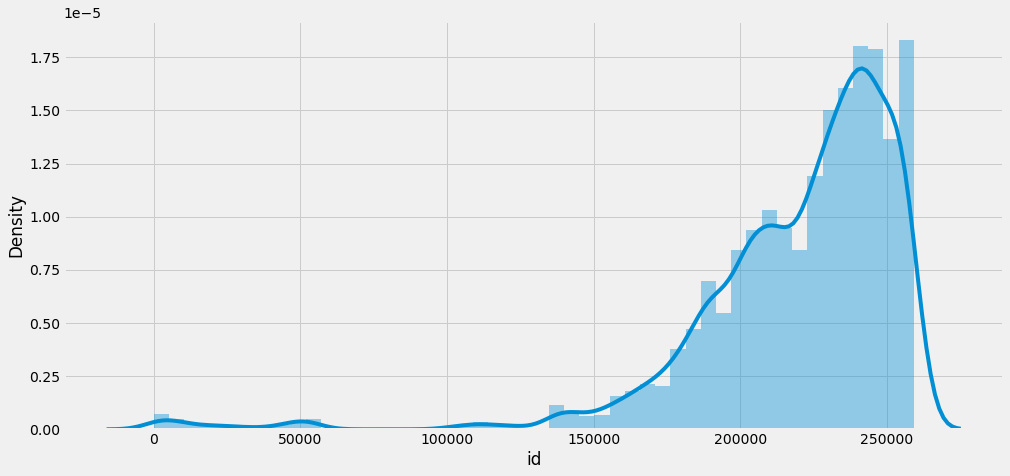

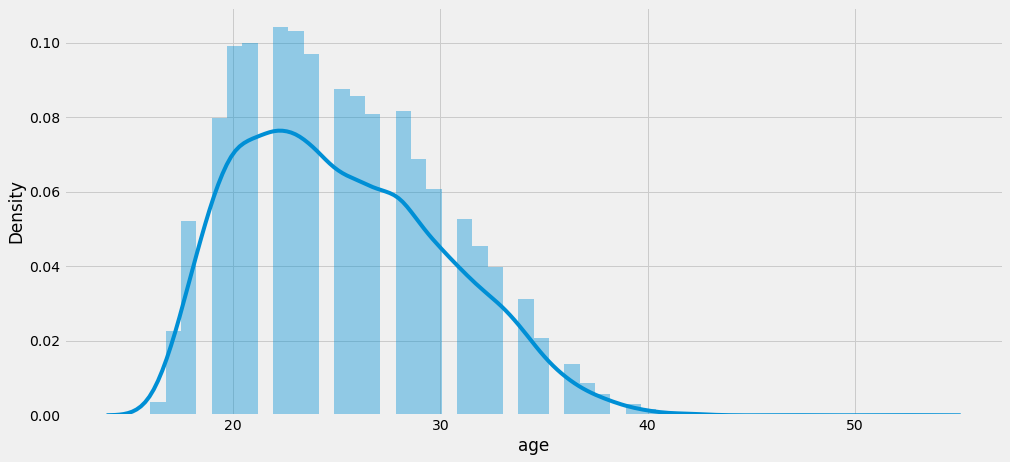

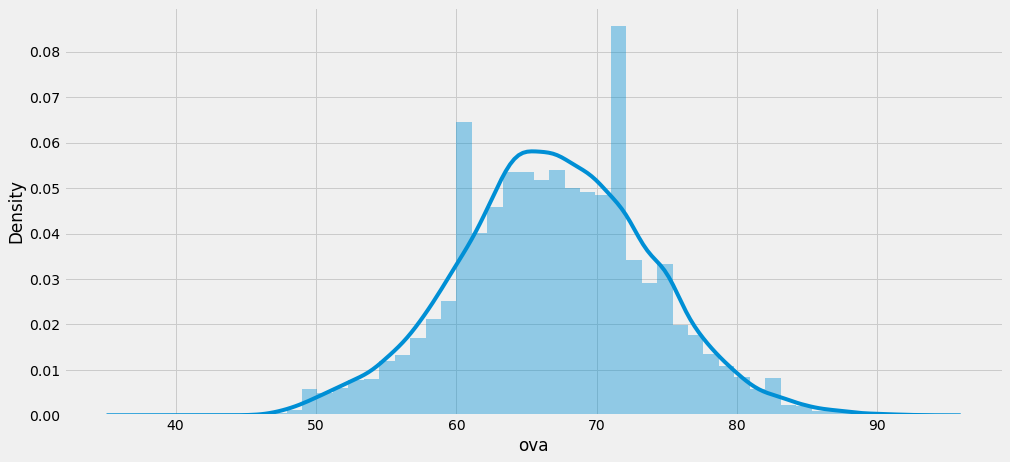

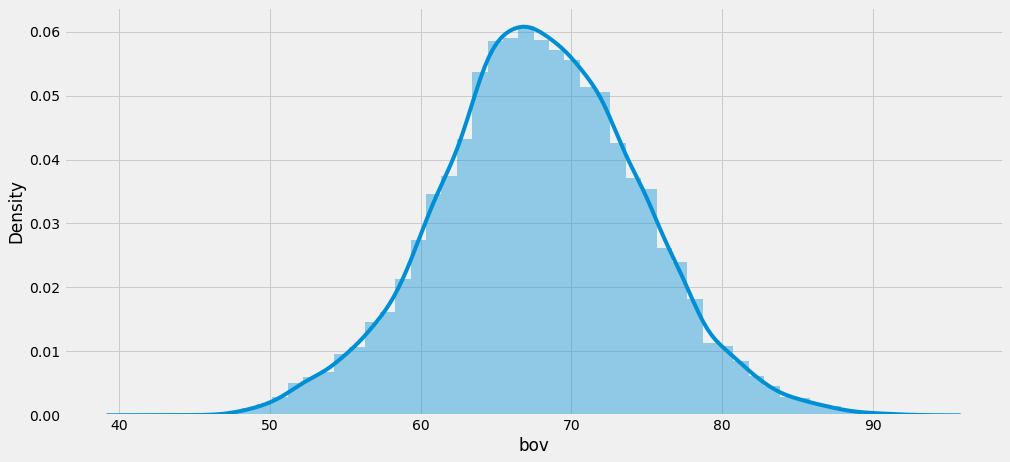

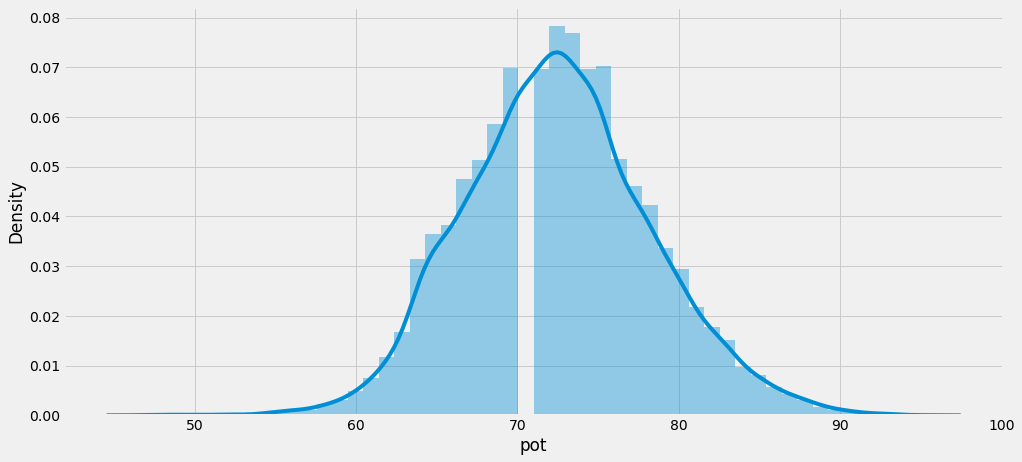

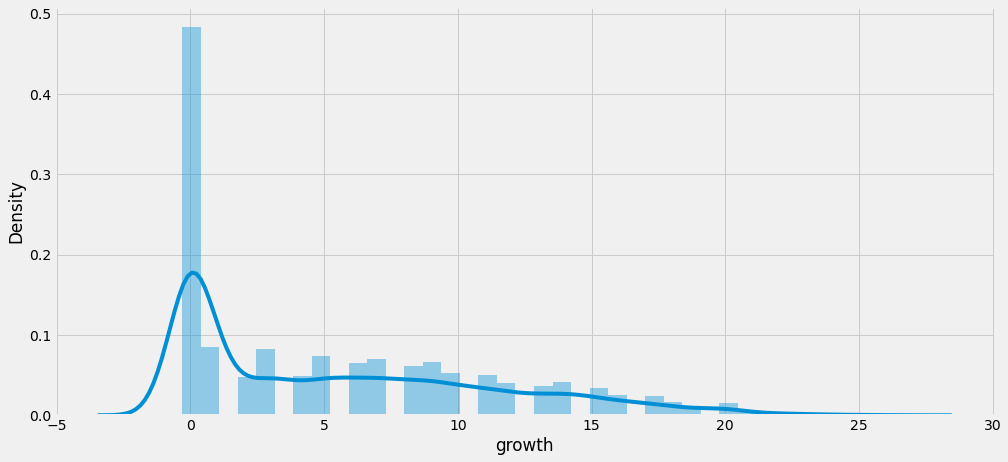

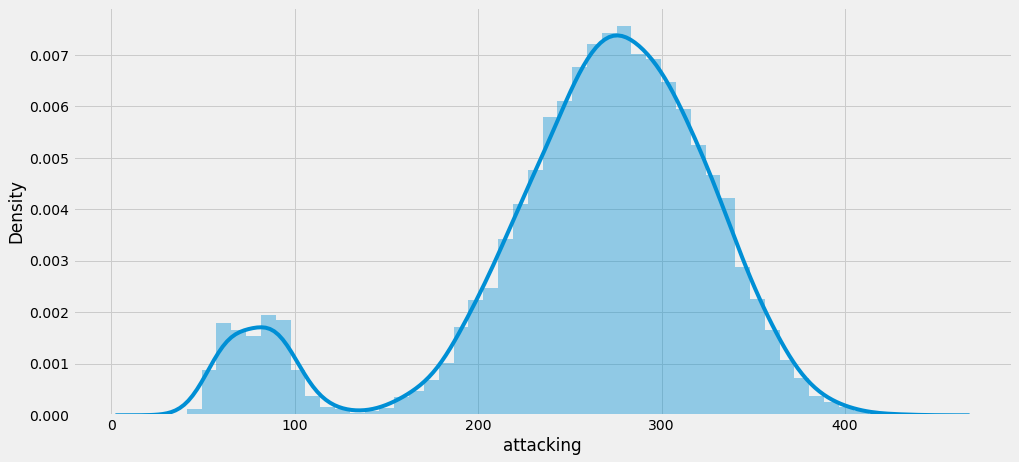

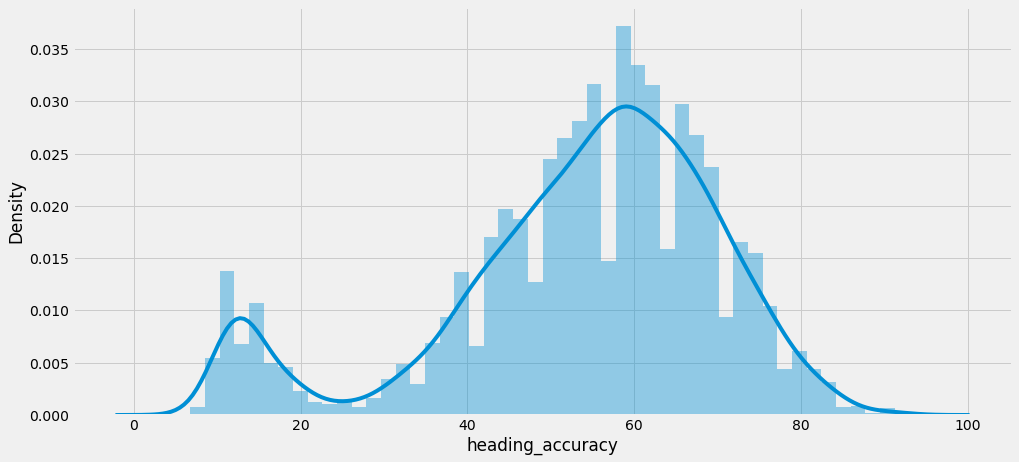

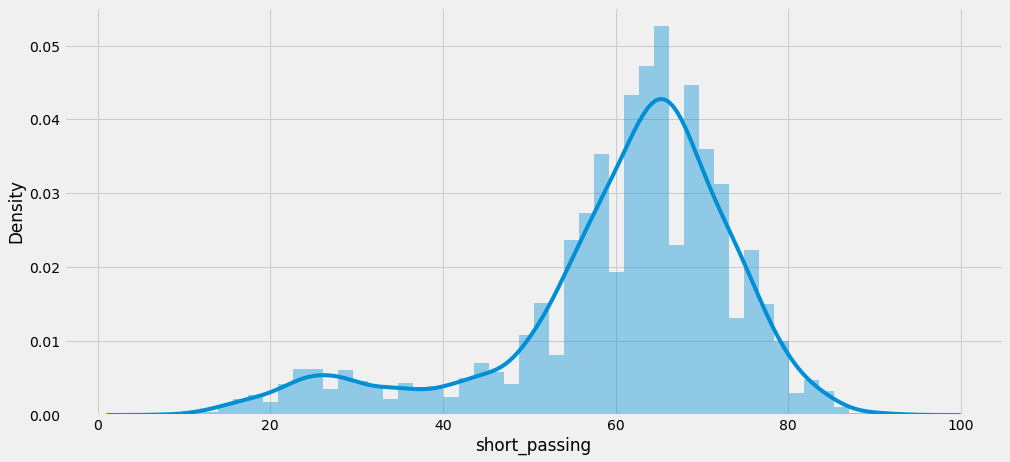

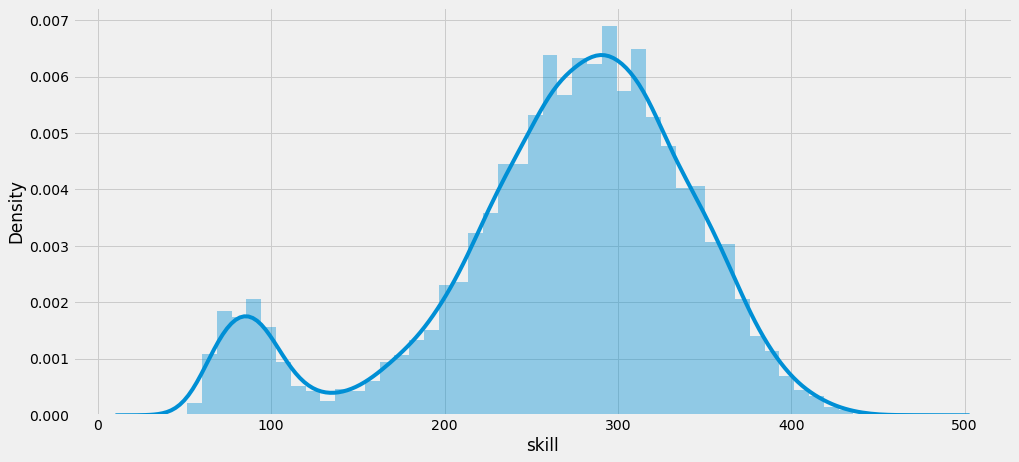

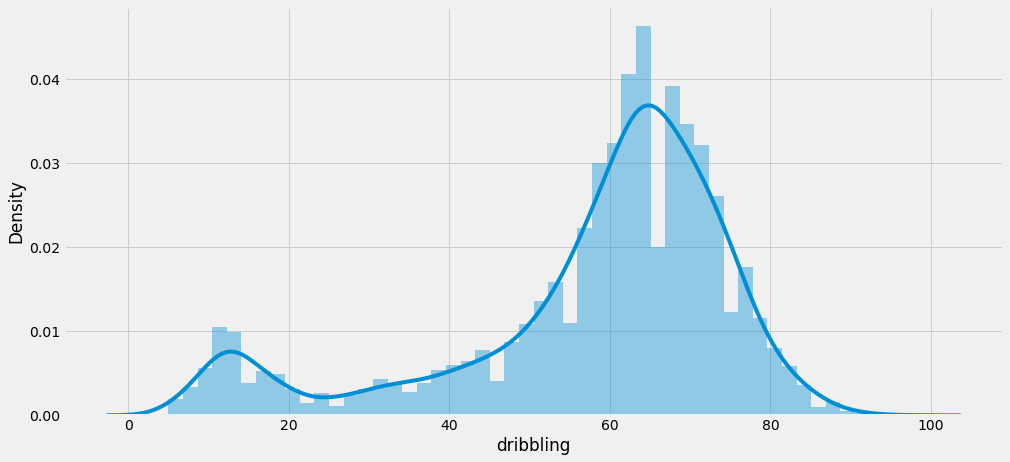

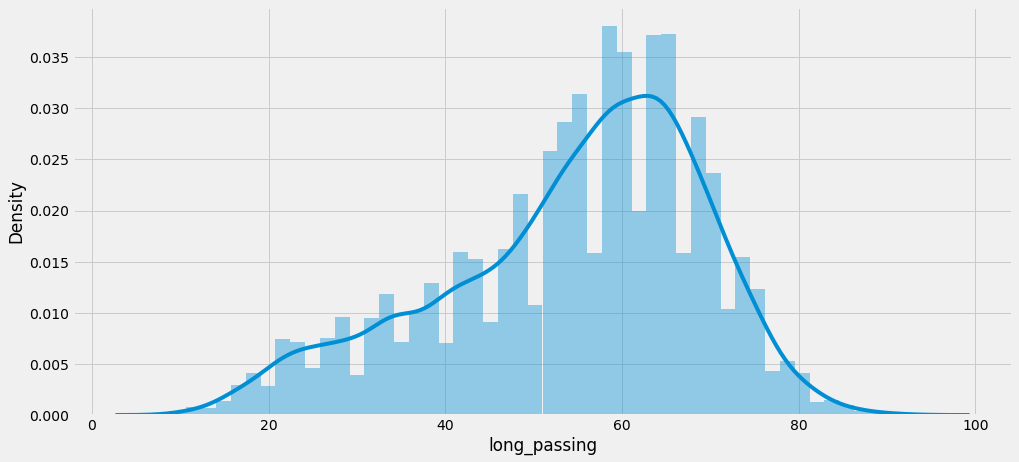

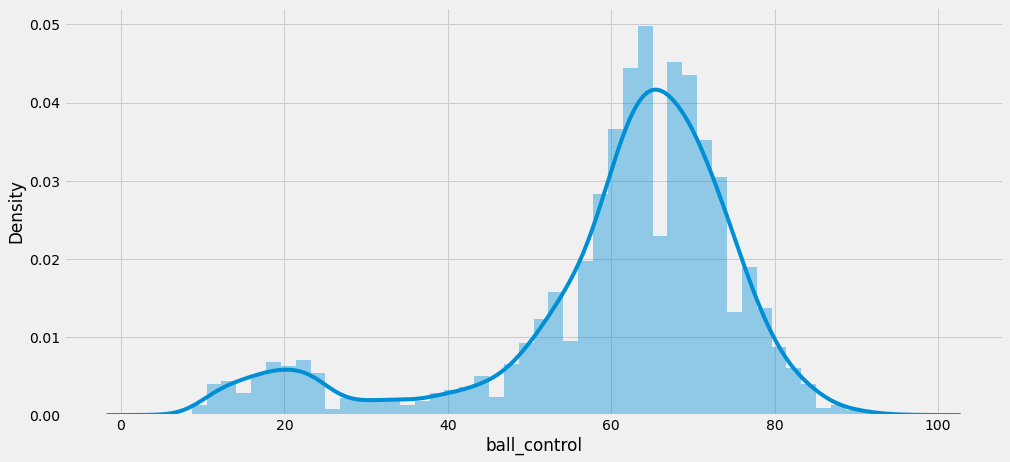

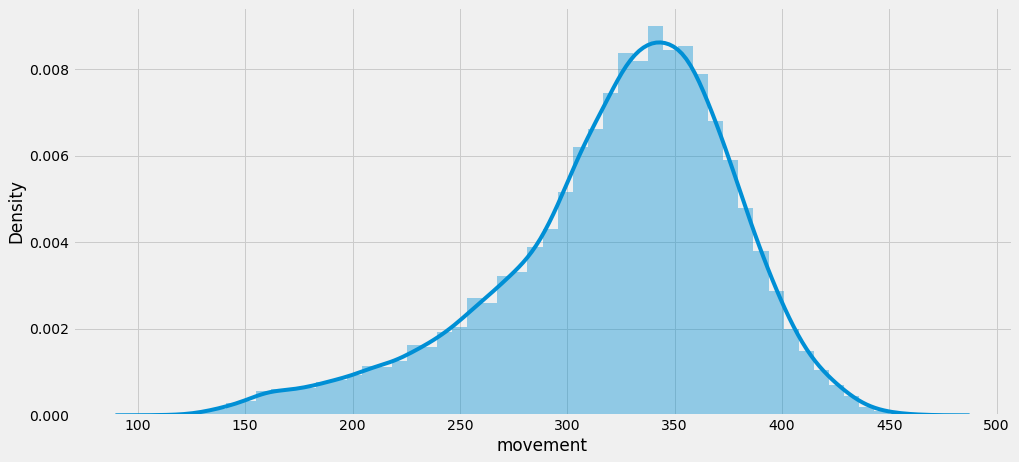

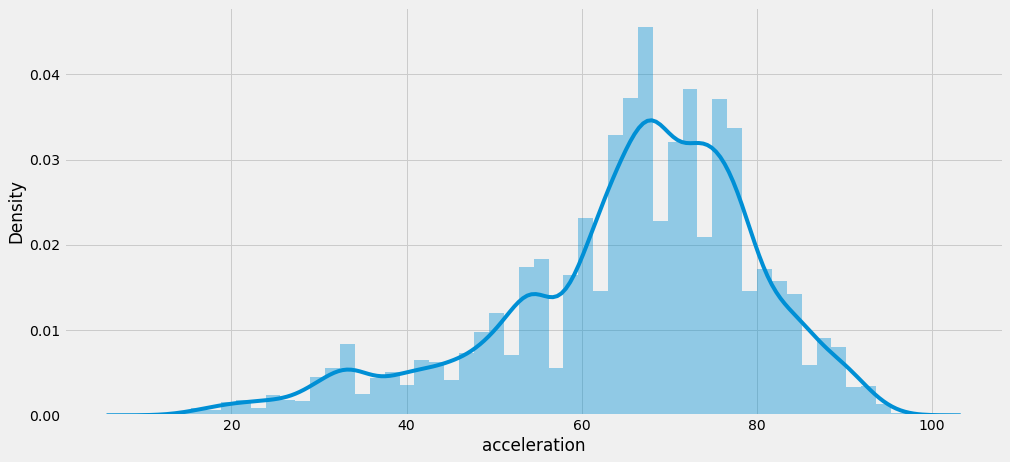

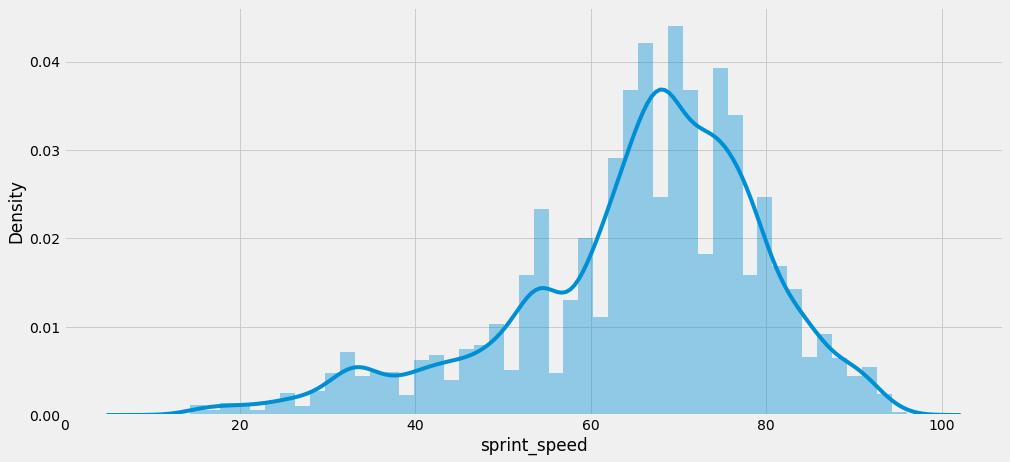

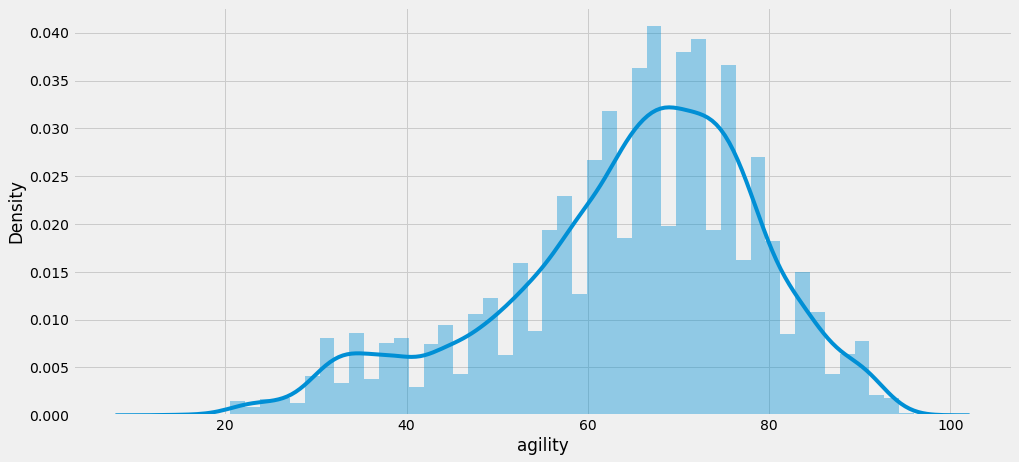

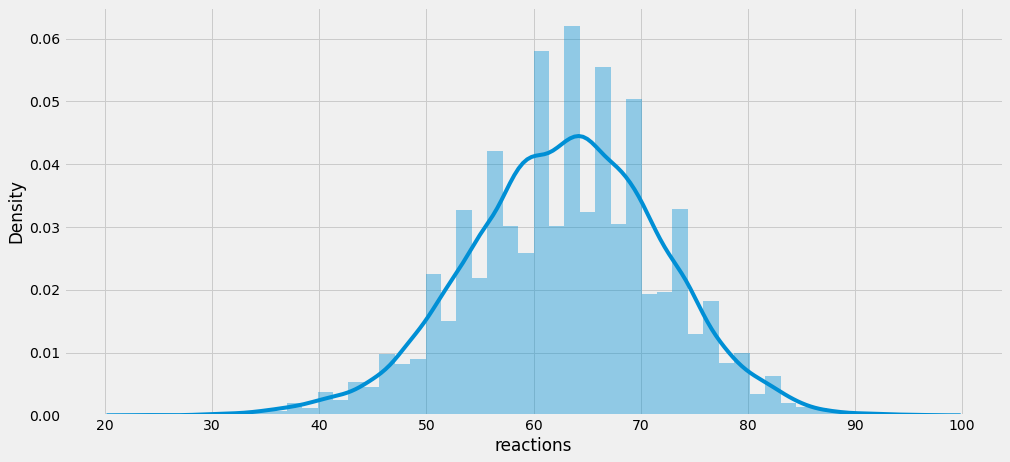

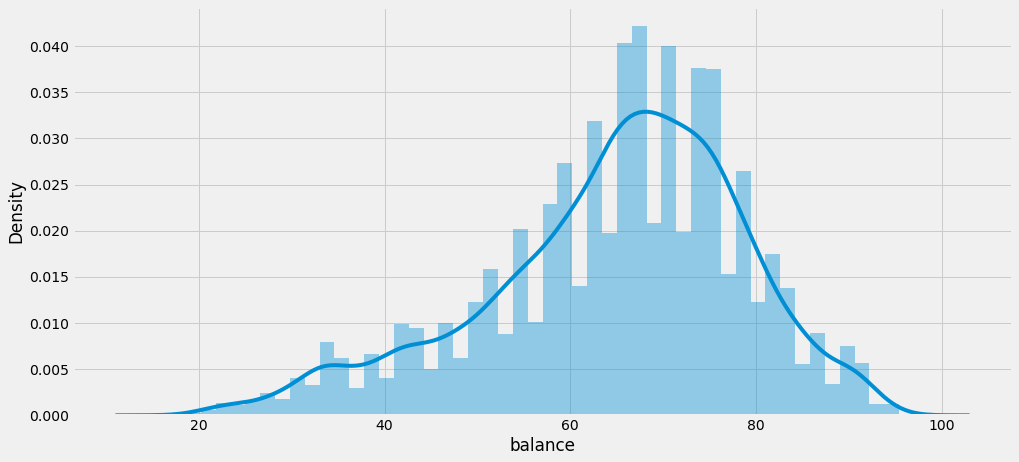

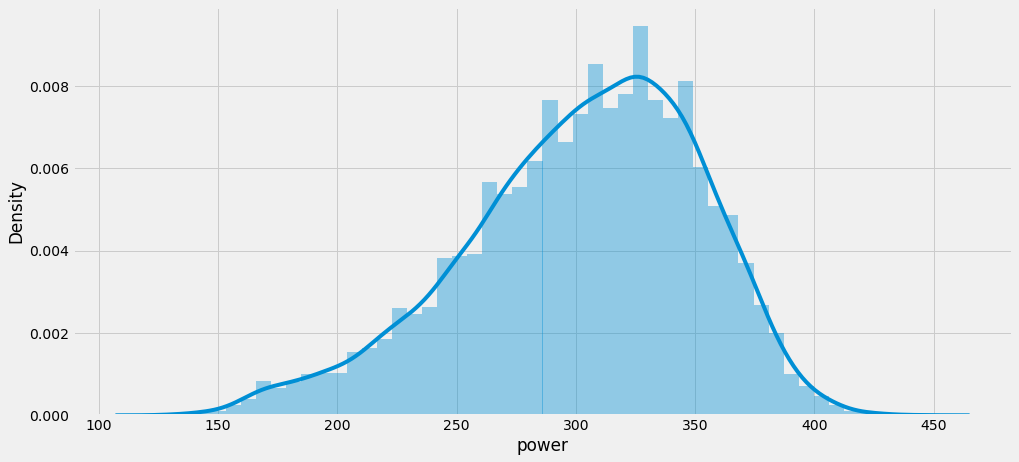

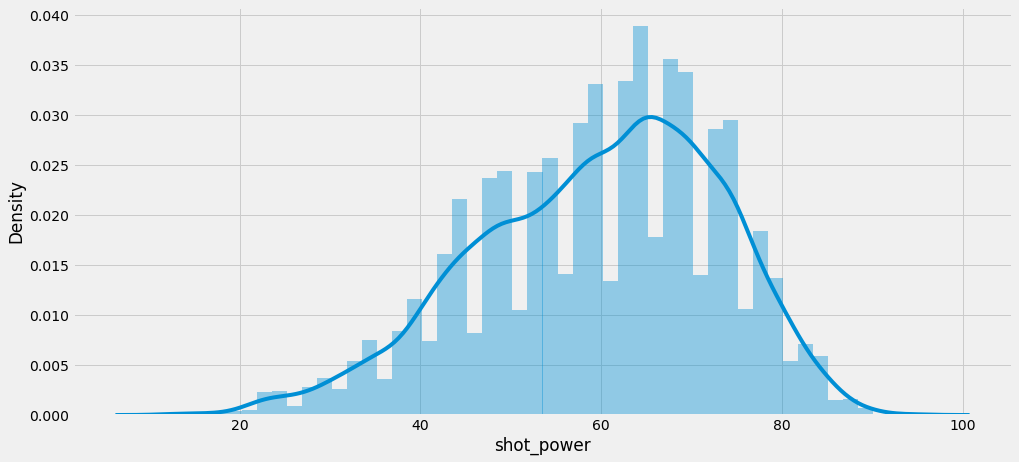

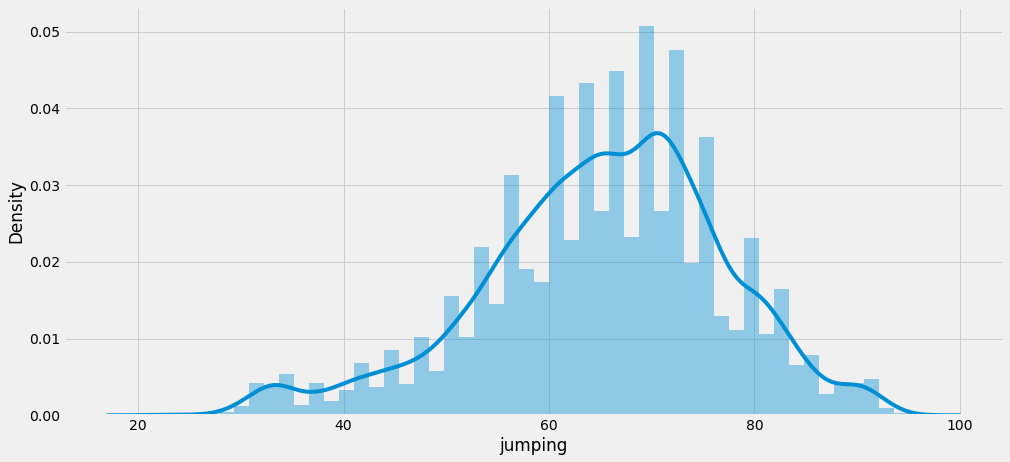

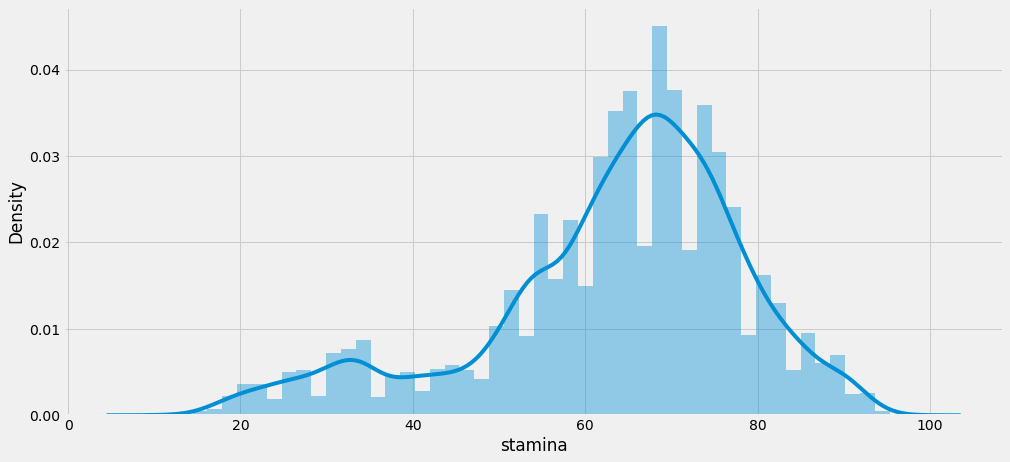

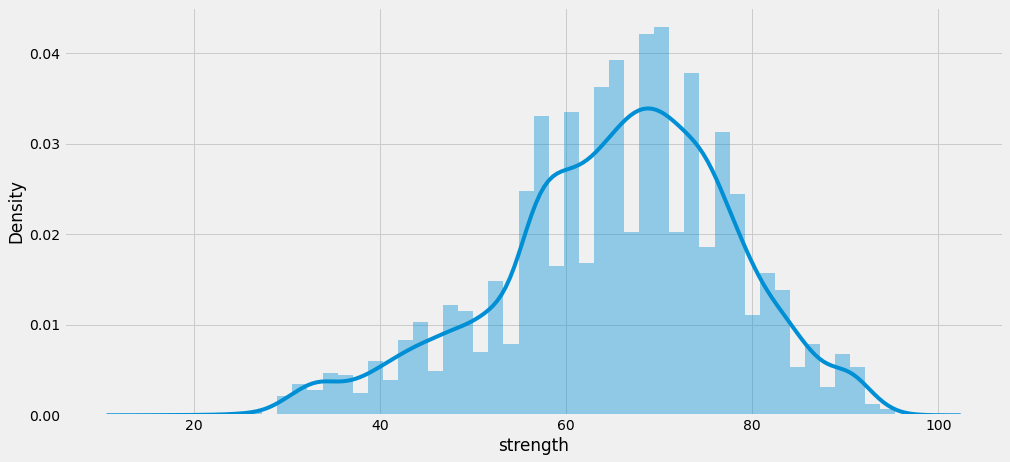

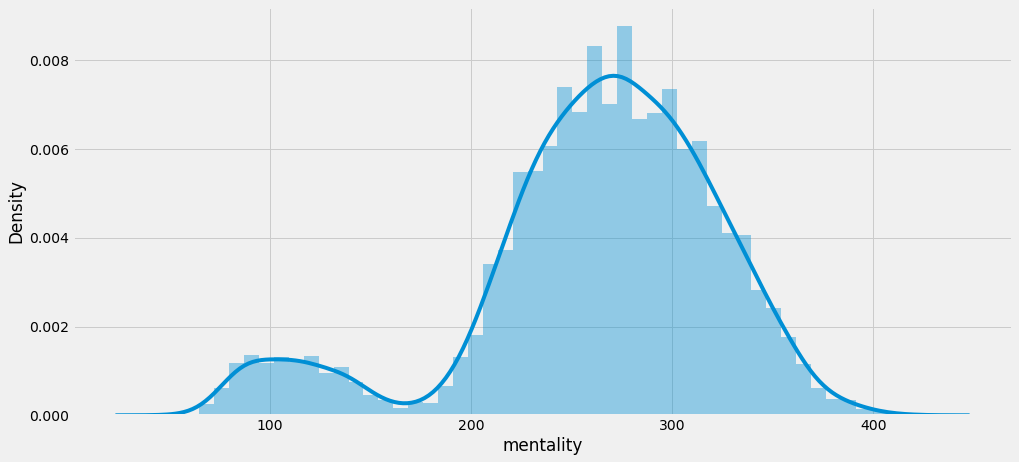

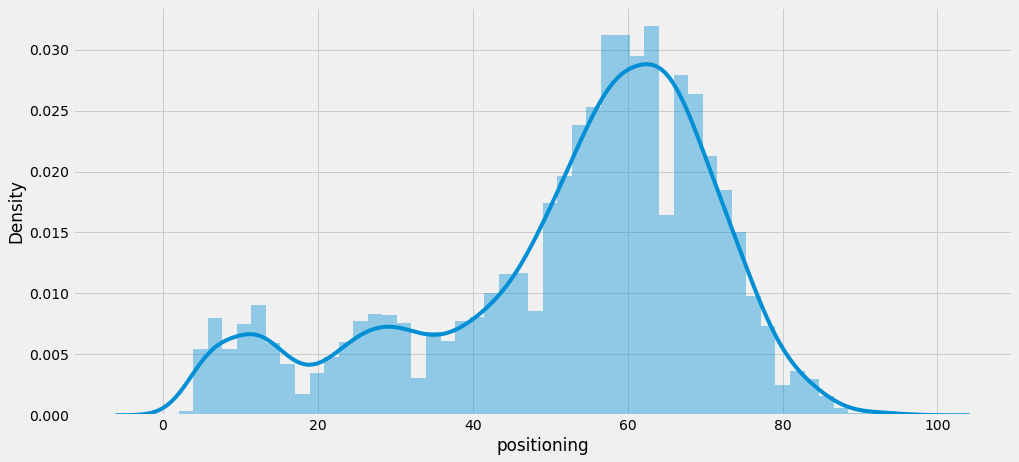

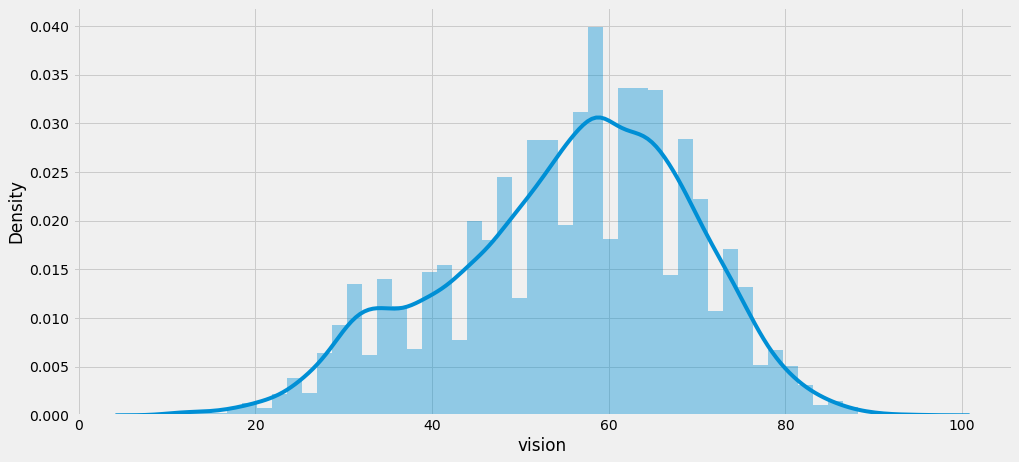

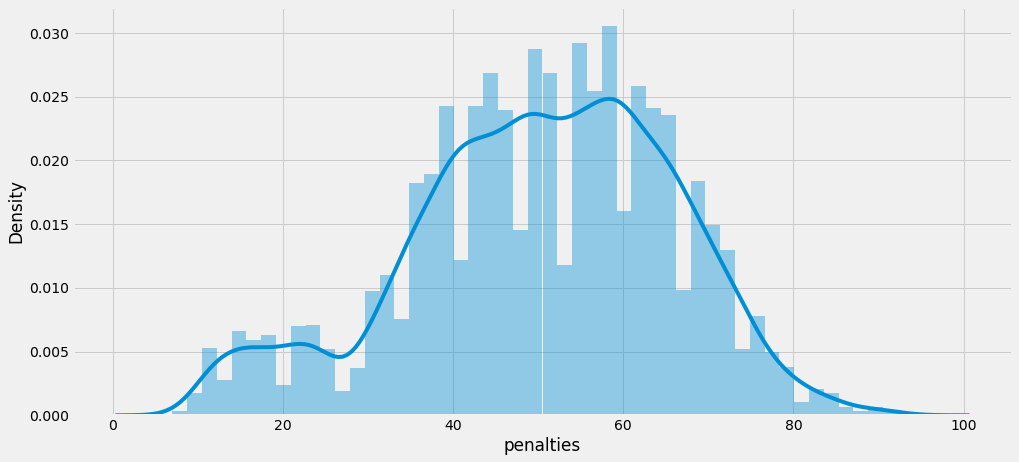

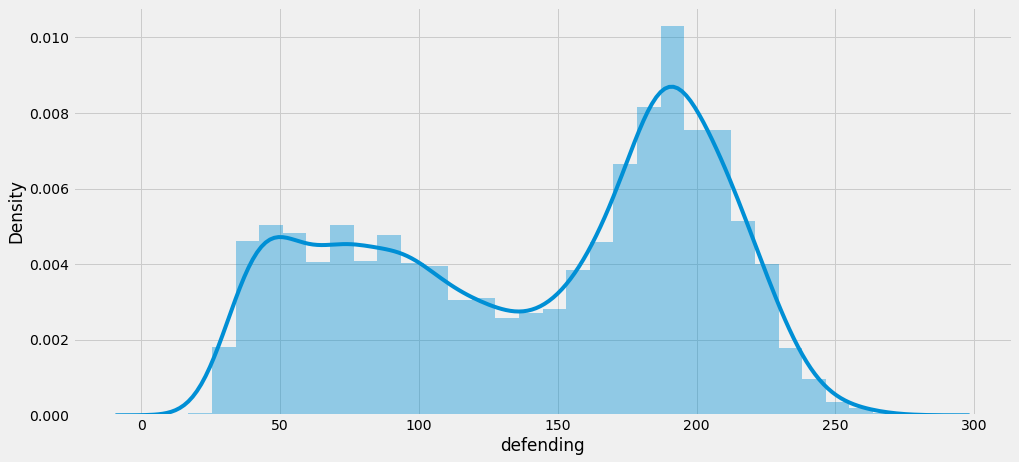

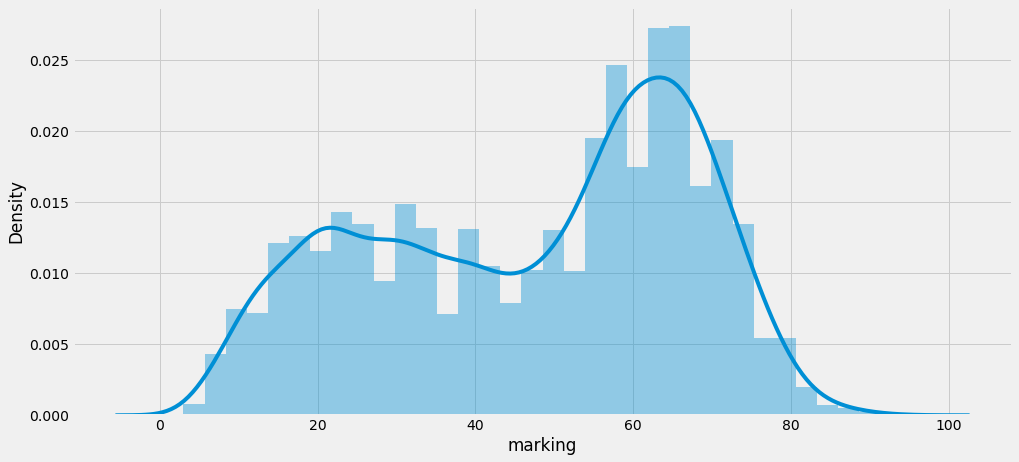

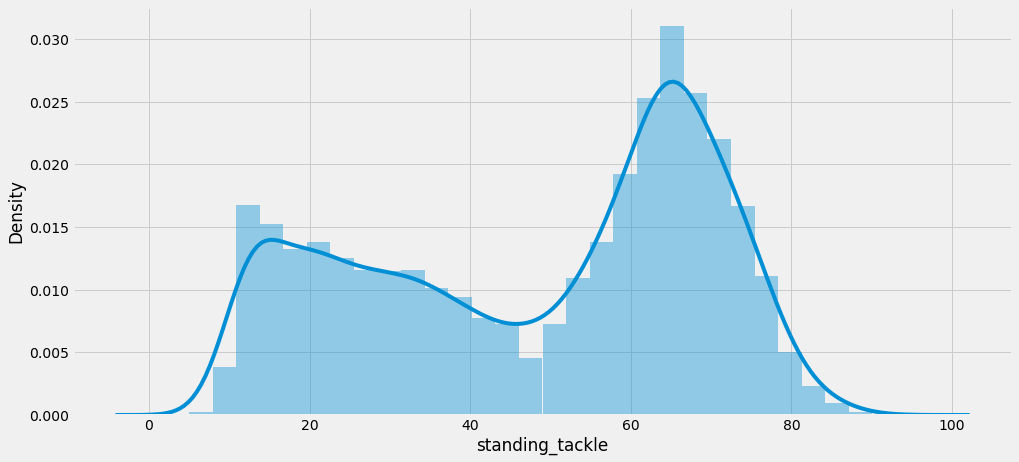

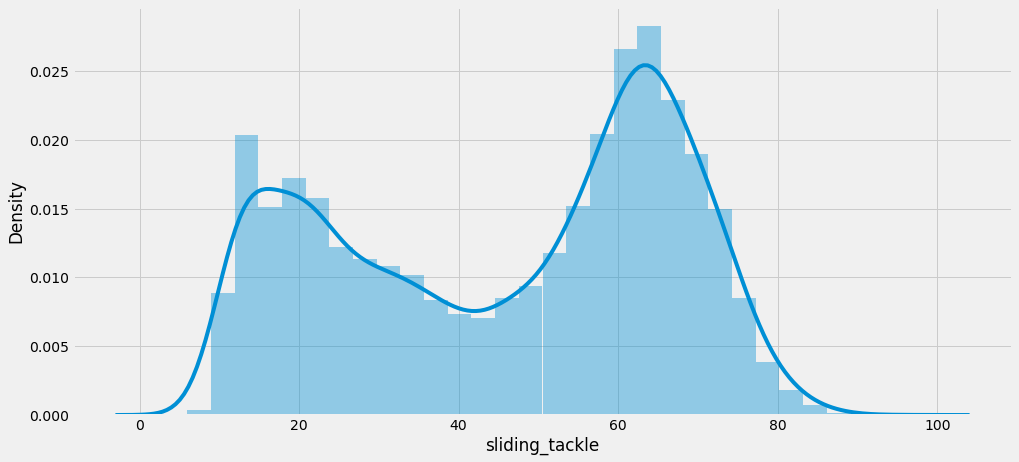

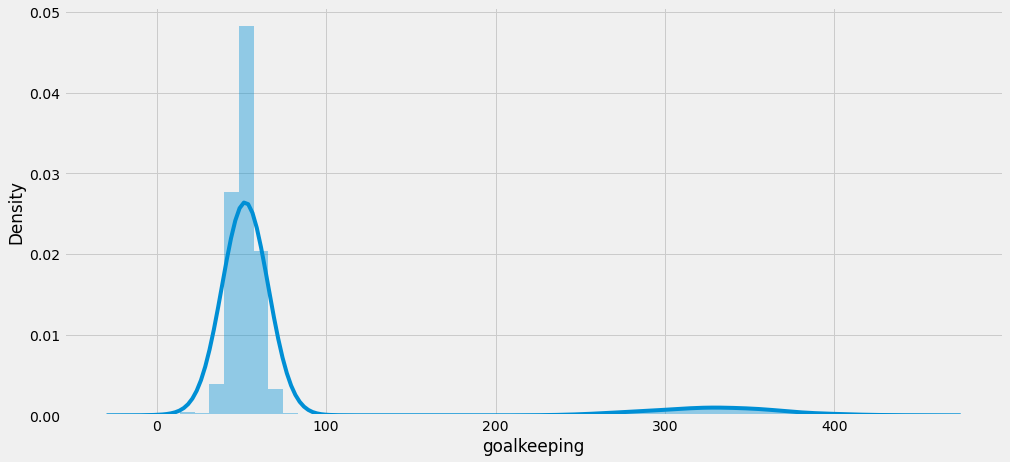

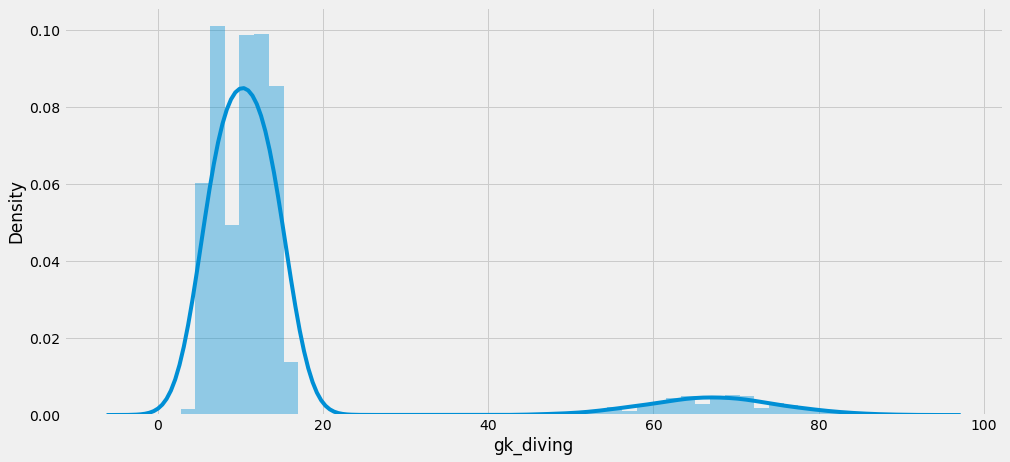

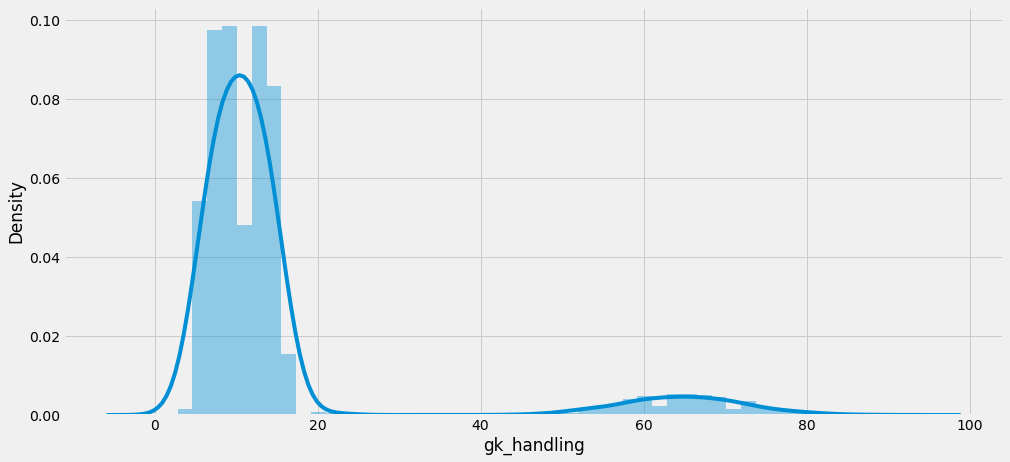

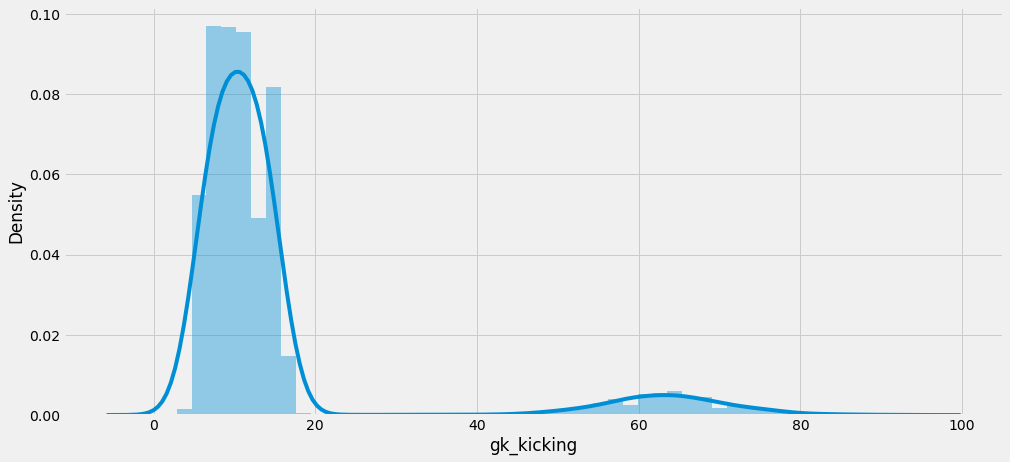

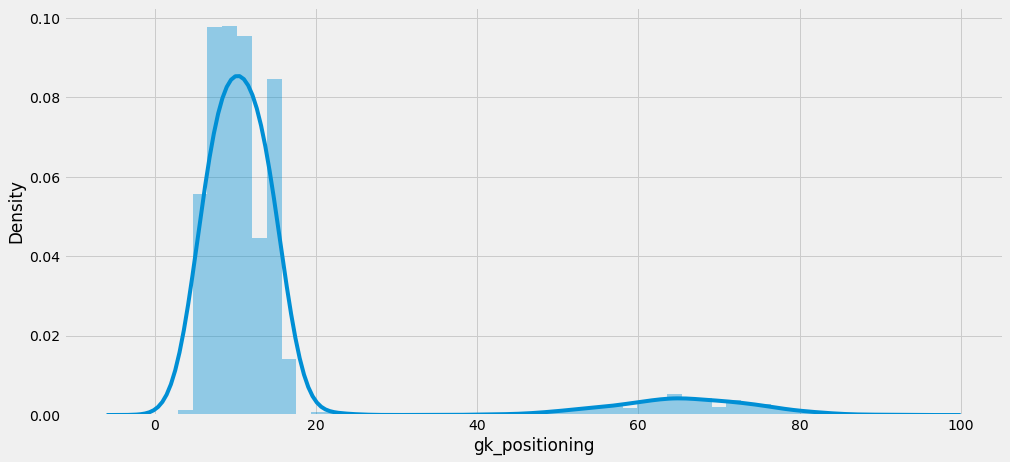

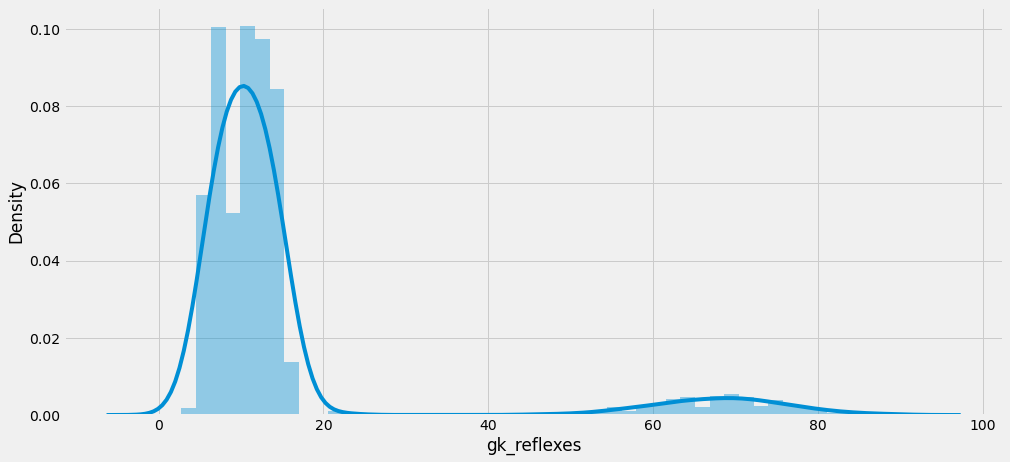

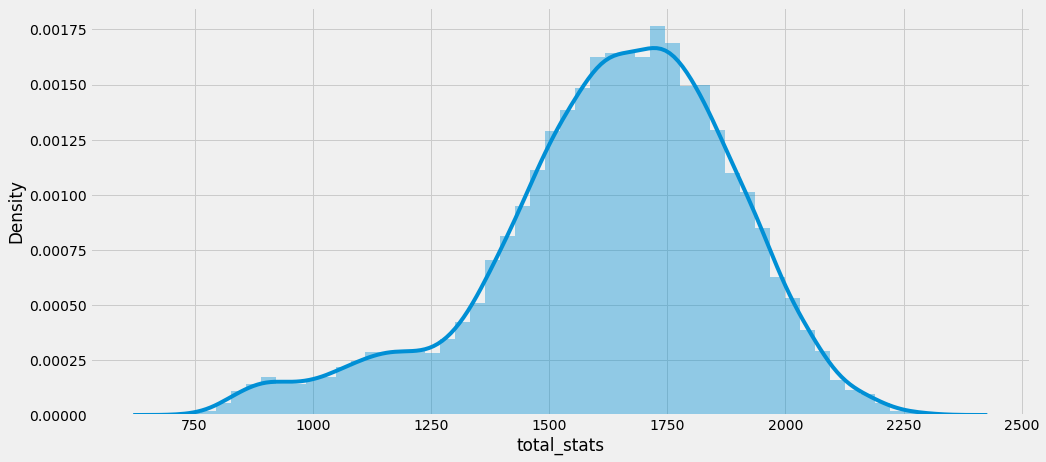

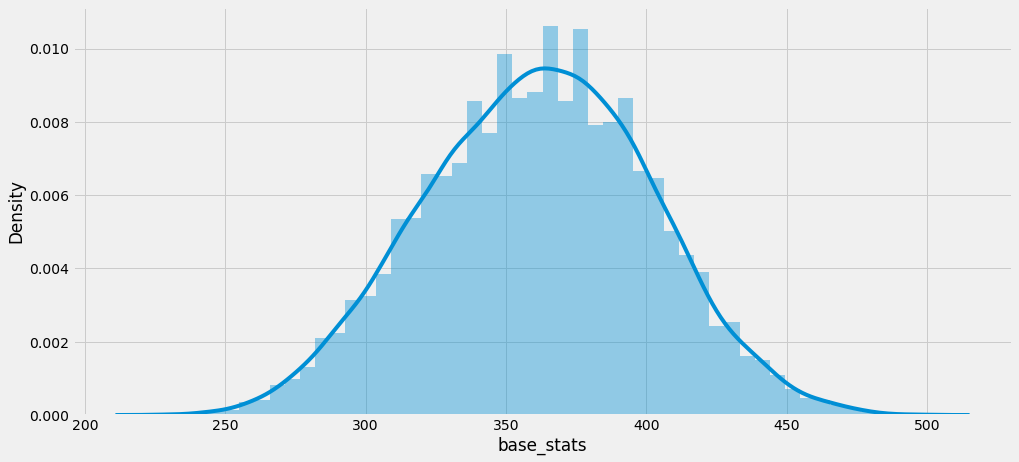

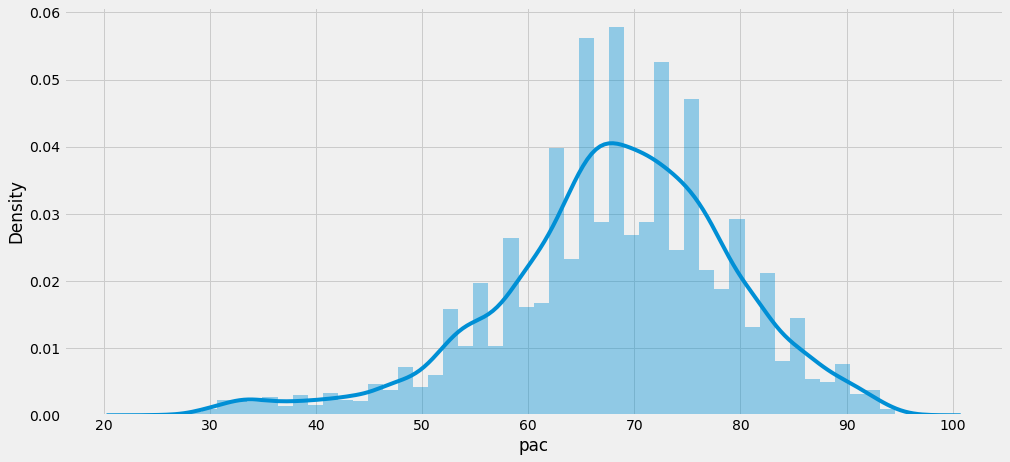

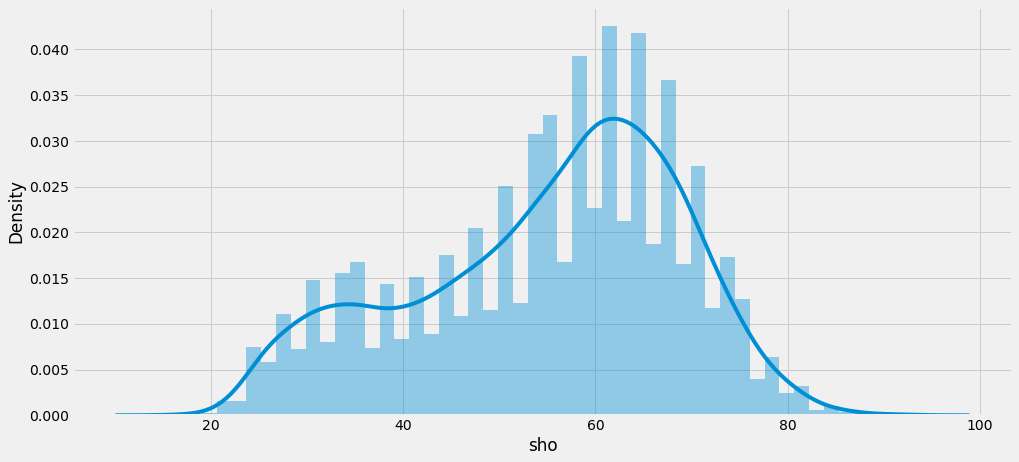

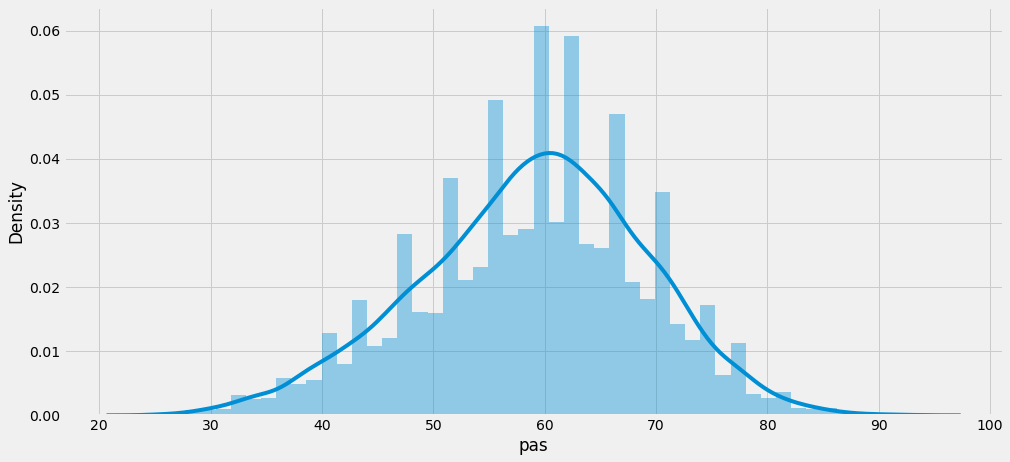

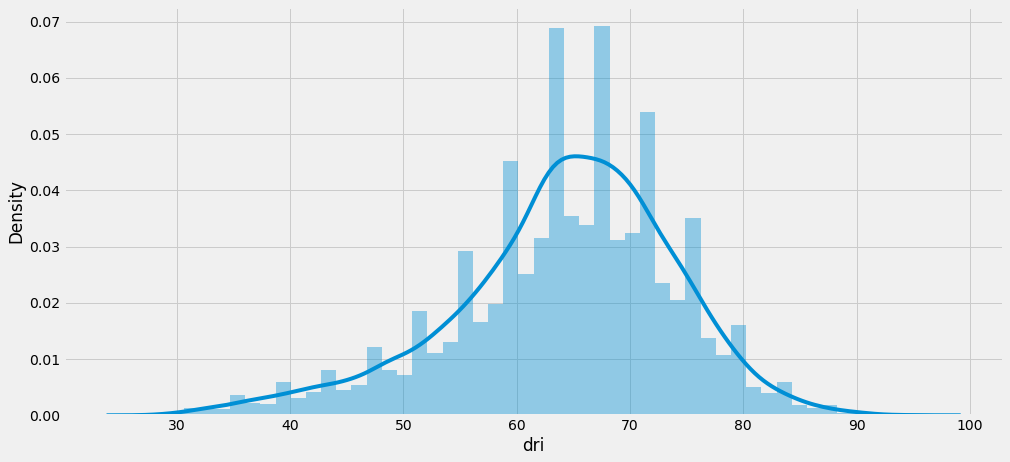

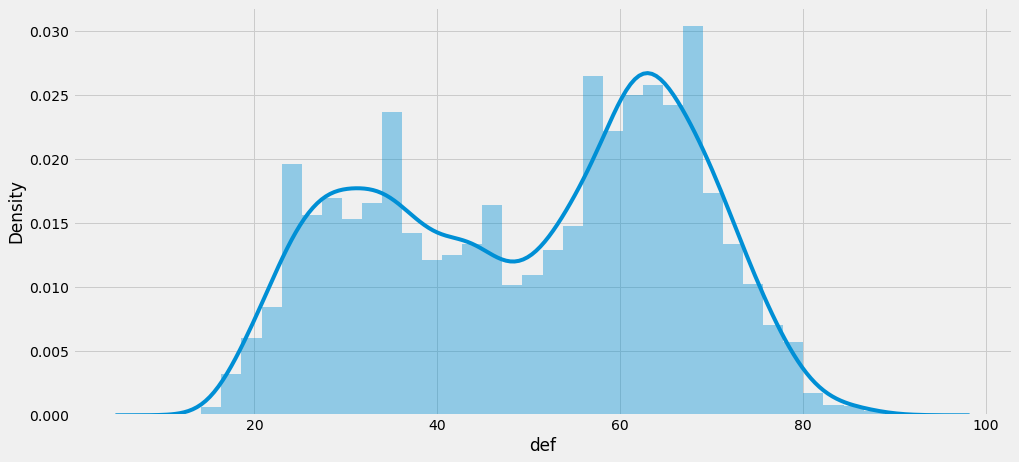

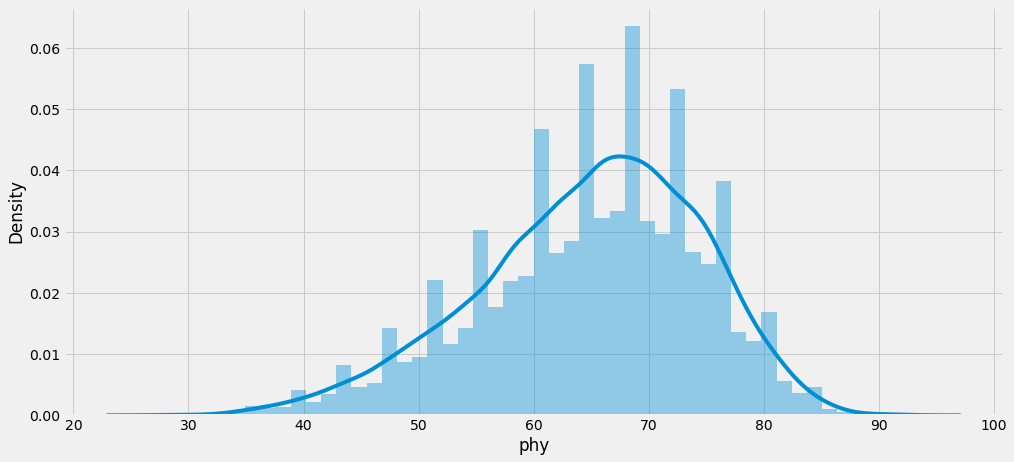

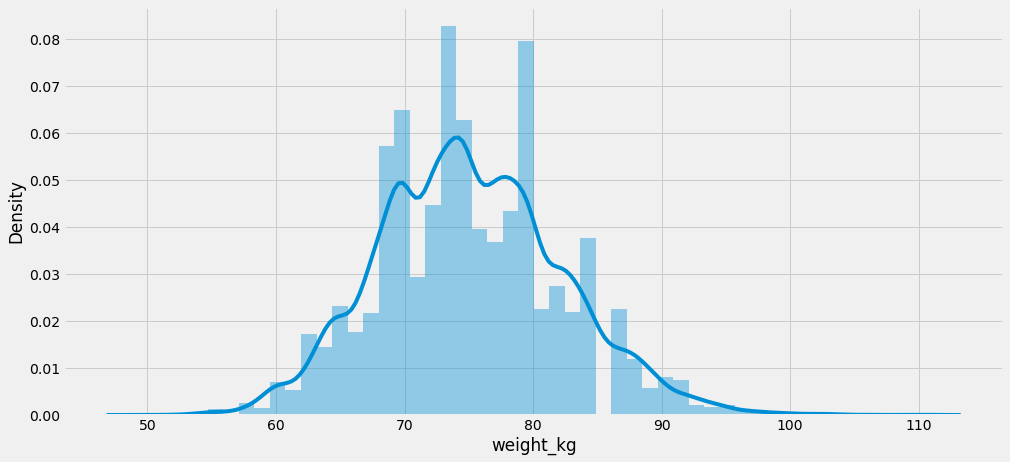

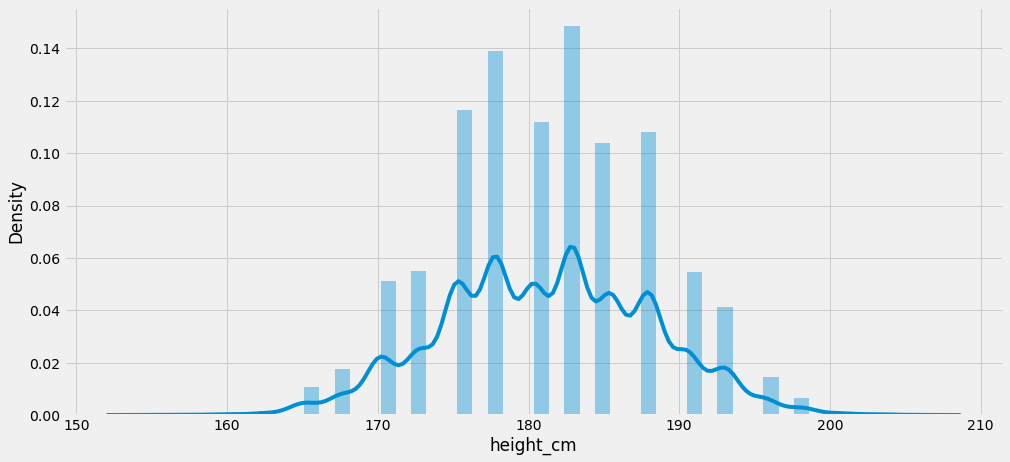

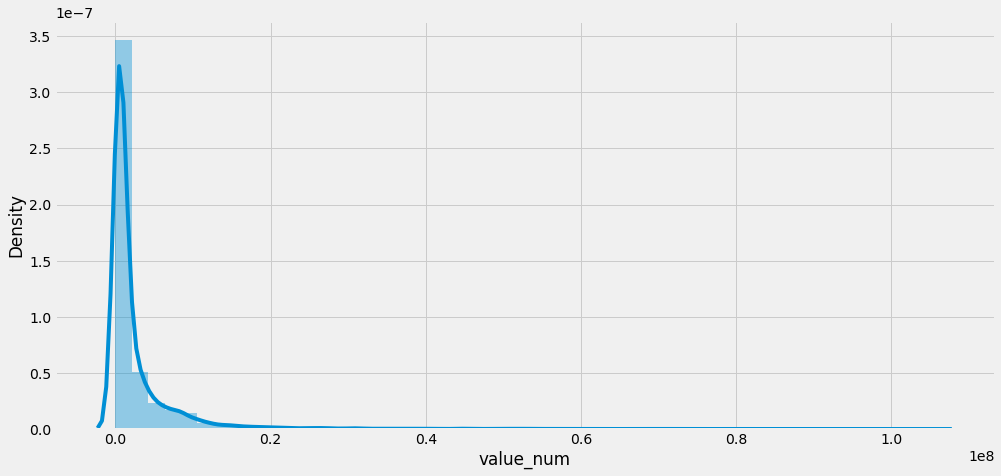

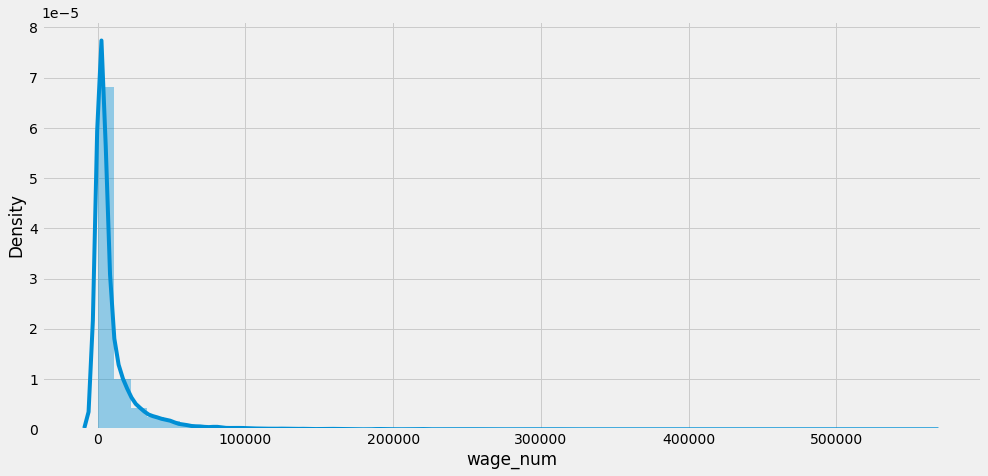

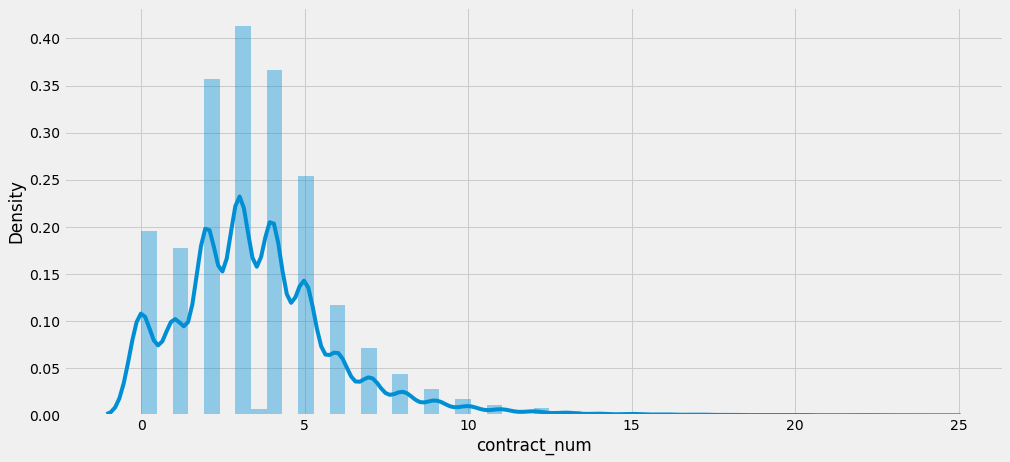

In [373]:
for column in df_num.columns: 
    sns.distplot(df_num[column])
    plt.show()

In [311]:
df_num.describe().T[:50]

count          mean           std      min         25%  \
id                17125.0  2.193887e+05  3.749920e+04    2.000  204082.000   
age               17125.0  2.527293e+01  4.942665e+00   16.000      21.000   
ova               17125.0  6.696502e+01  6.864329e+00   38.000      62.000   
bov               17125.0  6.790020e+01  6.637538e+00   42.000      64.000   
pot               17125.0  7.248981e+01  5.769949e+00   47.000      69.000   
growth            17125.0  5.524788e+00  5.787539e+00   -1.000       0.000   
attacking         17125.0  2.585378e+02  7.225569e+01   33.000     232.000   
heading_accuracy  17125.0  5.359883e+01  1.694716e+01    5.000      46.000   
short_passing     17125.0  6.050762e+01  1.396064e+01    7.000      56.000   
skill             17125.0  2.666076e+02  7.680934e+01   43.000     232.000   
dribbling         17125.0  5.784642e+01  1.804725e+01    5.000      53.000   
long_passing      17125.0  5.432432e+01  1.485691e+01    9.000      45.000   
ball_control      17125.0  6.064280e+01  1.587365e+01    5.000      57.000   
movement          17125.0  3.226937e+02  5.493359e+01  113.000     294.000   
acceleration      17125.0  6.544590e+01  1.465789e+01   12.000      58.000   
sprint_speed      17125.0  6.544304e+01  1.443738e+01   11.000      59.000   
agility           17125.0  6.460227e+01  1.434808e+01   14.000      57.000   
reactions         17125.0  6.292485e+01  9.037279e+00   24.000      57.000   
balance           17125.0  6.471559e+01  1.400778e+01   17.000      57.000   
power             17125.0  3.024148e+02  4.938058e+01  128.000     272.000   
shot_power        17125.0  5.971142e+01  1.341793e+01   12.000      50.000   
jumping           17125.0  6.517021e+01  1.189786e+01   22.000      58.000   
stamina           17125.0  6.330961e+01  1.531327e+01   11.000      56.000   
strength          17125.0  6.530855e+01  1.262721e+01   16.000      58.000   
mentality         17125.0  2.619228e+02  6.291394e+01   50.000     235.000   
positioning       17125.0  5.237277e+01  1.909053e+01    2.000      43.000   
vision            17125.0  5.544360e+01  1.370681e+01   10.000      47.000   
penalties         17125.0  5.025145e+01  1.569636e+01    7.000      40.000   
defending         17125.0  1.414699e+02  6.159518e+01   17.000      84.000   
marking           17125.0  4.724695e+01  2.018255e+01    3.000      29.000   
standing_tackle   17125.0  4.827936e+01  2.148360e+01    5.000      28.000   
sliding_tackle    17125.0  4.609972e+01  2.114925e+01    6.000      25.000   
goalkeeping       17125.0  7.760969e+01  8.113660e+01    5.000      48.000   
gk_diving         17125.0  1.560047e+01  1.682864e+01    1.000       8.000   
gk_handling       17125.0  1.548467e+01  1.614368e+01    1.000       8.000   
gk_kicking        17125.0  1.547206e+01  1.599733e+01    1.000       8.000   
gk_positioning    17125.0  1.551428e+01  1.640606e+01    1.000       8.000   
gk_reflexes       17125.0  1.573863e+01  1.713091e+01    1.000       8.000   
total_stats       17125.0  1.631256e+03  2.603570e+02  731.000    1492.000   
base_stats        17125.0  3.613721e+02  4.025229e+01  228.000     333.000   
pac               17125.0  6.809162e+01  1.114712e+01   25.000      62.000   
sho               17125.0  5.496730e+01  1.387761e+01   16.000      46.000   
pas               17125.0  5.892654e+01  1.018673e+01   25.000      52.000   
dri               17125.0  6.420987e+01  9.832734e+00   28.000      59.000   
def               17125.0  5.026610e+01  1.685380e+01   12.000      35.000   
phy               17125.0  6.491072e+01  9.660260e+00   27.000      59.000   
weight_kg         17125.0  7.512629e+01  7.173547e+00   49.885      69.839   
height_cm         17125.0  1.812230e+02  6.886553e+00  154.940     175.260   
value_num         17125.0  2.567377e+06  5.372622e+06    0.000  375000.000   
wage_num          17125.0  1.053293e+04  2.114538e+04    0.000    1000.000   

                          50%          75

## 6.3. devide the dataframe into x/y obj/num and look at the head

In [374]:
y = df_num['value_num']
X = df_num.drop(['value_num'], axis=1)

In [375]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

drop **joined_year column** because to much value nulls

In [376]:
df_obj = pd.DataFrame(df.select_dtypes(include = np.object).drop(['joined_year'], axis=1))
df_obj.head()

name            nationality           club   bp  \
0  G. Pasquale                  Italy        Udinese  LWB   
1  Luis García                  Spain      KAS Eupen   CM   
2      J. Cole                England  Coventry City  CAM   
3     D. Yorke  Trinidad &amp; Tobago     Sunderland   ST   
4      Iniesta                  Spain    Vissel Kobe  CAM   

                             position   foot  \
0                                  LM   Left   
1                          CM CAM CDM  Right   
2                        CAM RM RW LM  Right   
3  df.position.value_counts().head(1)  Right   
4                              CM CAM  Right   

                                  a/w                                 d/w hits  
0                              Medium                                High    4  
1                              Medium                              Medium    4  
2                              Medium                                 Low   11  
3  df.position.value_counts().head(1)  df.position.value_counts().head(1)    3  
4                                High                              Medium  149

## 6.4. check out the correlation of the numeric data

In [377]:
X_num_matrix = df_num.corr()
X_num_matrix

id       age       ova       bov       pot    growth  \
id                1.000000 -0.743844 -0.431079 -0.385713  0.042604  0.553757   
age              -0.743844  1.000000  0.517099  0.456734 -0.237619 -0.850204   
ova              -0.431079  0.517099  1.000000  0.985877  0.592268 -0.595585   
bov              -0.385713  0.456734  0.985877  1.000000  0.628323 -0.542890   
pot               0.042604 -0.237619  0.592268  0.628323  1.000000  0.294499   
growth            0.553757 -0.850204 -0.595585 -0.542890  0.294499  1.000000   
attacking        -0.178002  0.183954  0.431238  0.464329  0.233866 -0.278316   
heading_accuracy -0.148036  0.172793  0.305553  0.335677  0.137199 -0.225620   
short_passing    -0.173987  0.176786  0.492372  0.533046  0.318544 -0.266404   
skill            -0.175488  0.168876  0.441689  0.473888  0.265503 -0.259171   
dribbling        -0.061919  0.039607  0.350249  0.388163  0.264651 -0.151568   
long_passing     -0.215201  0.223088  0.482655  0.515422  0.283647 -0.289670   
ball_control     -0.134706  0.121097  0.431284  0.471454  0.292414 -0.220001   
movement          0.062316 -0.055642  0.302267  0.335011  0.258243 -0.101046   
acceleration      0.167381 -0.186610  0.143928  0.179547  0.197884  0.026576   
sprint_speed      0.170565 -0.180717  0.153476  0.189491  0.197396  0.014764   
agility           0.019099 -0.041315  0.226127  0.254781  0.189332 -0.079442   
reactions        -0.421033  0.501010  0.870084  0.870157  0.471139 -0.562259   
balance           0.038199 -0.085504  0.100438  0.127728  0.131481  0.011956   
power            -0.224439  0.310459  0.546417  0.572275  0.221586 -0.427168   
shot_power       -0.279340  0.304947  0.534829  0.550932  0.266902 -0.368246   
jumping          -0.141330  0.196550  0.258627  0.262992  0.075942 -0.231034   
stamina           0.014947  0.069741  0.335108  0.368788  0.170122 -0.227850   
strength         -0.246480  0.350439  0.338347  0.335436  0.030991 -0.370401   
mentality        -0.246674  0.272976  0.495097  0.523526  0.243646 -0.344307   
positioning      -0.127740  0.122510  0.339672  0.368071  0.191910 -0.211542   
vision           -0.240620  0.235359  0.505168  0.527542  0.304512 -0.295569   
penalties        -0.218133  0.198917  0.317666  0.340311  0.147044 -0.230172   
defending        -0.070775  0.114796  0.248247  0.267770  0.138748 -0.156108   
marking          -0.106629  0.155497  0.290071  0.309674  0.147320 -0.197168   
standing_tackle  -0.073895  0.106178  0.237478  0.257583  0.138787 -0.143297   
sliding_tackle   -0.054644  0.085663  0.208920  0.227278  0.128934 -0.119249   
goalkeeping      -0.095273  0.125933  0.038222 -0.008702 -0.007277 -0.052589   
gk_diving        -0.089003  0.120891  0.037851 -0.008851 -0.005874 -0.050750   
gk_handling      -0.100717  0.125251  0.037993 -0.008312 -0.005240 -0.050286   
gk_kicking       -0.122380  0.130810  0.038650 -0.006124 -0.002734 -0.048566   
gk_positioning   -0.106509  0.134369  0.044653 -0.000933 -0.004015 -0.056963   
gk_reflexes      -0.094745  0.121822  0.037284 -0.008819 -0.005215 -0.049419   
total_stats      -0.236634  0.280383  0.607676  0.635037  0.329178 -0.392559   
base_stats       -0.339341  0.414897  0.832618  0.830127  0.474763 -0.514210   
pac               0.175293 -0.177291  0.201319  0.212889  0.259294  0.019730   
sho              -0.284713  0.309438  0.487060  0.478573  0.244481 -0.333941   
pas              -0.366366  0.396082  0.699229  0.689975  0.395773 -0.434753   
dri              -0.232583  0.241027  0.643427  0.640746  0.445004 -0.319487   
def              -0.165248  0.223184  0.344906  0.349906  0.170562 -0.239034   
phy              -0.295857  0.436462  0.543354  0.535579  0.159959 -0.484974   
weight_kg        -0.196765  0.258682  0.151834  0.132560 -0.039809 -0.219772   
height_cm        -0.079320  0.092935  0.027077  0.015950 -0.021094 -0.053145   
value_num        -0.094638  0.095981  0.631679  0.640818  0.563570 -0.187347   
wage_num         -0.2223

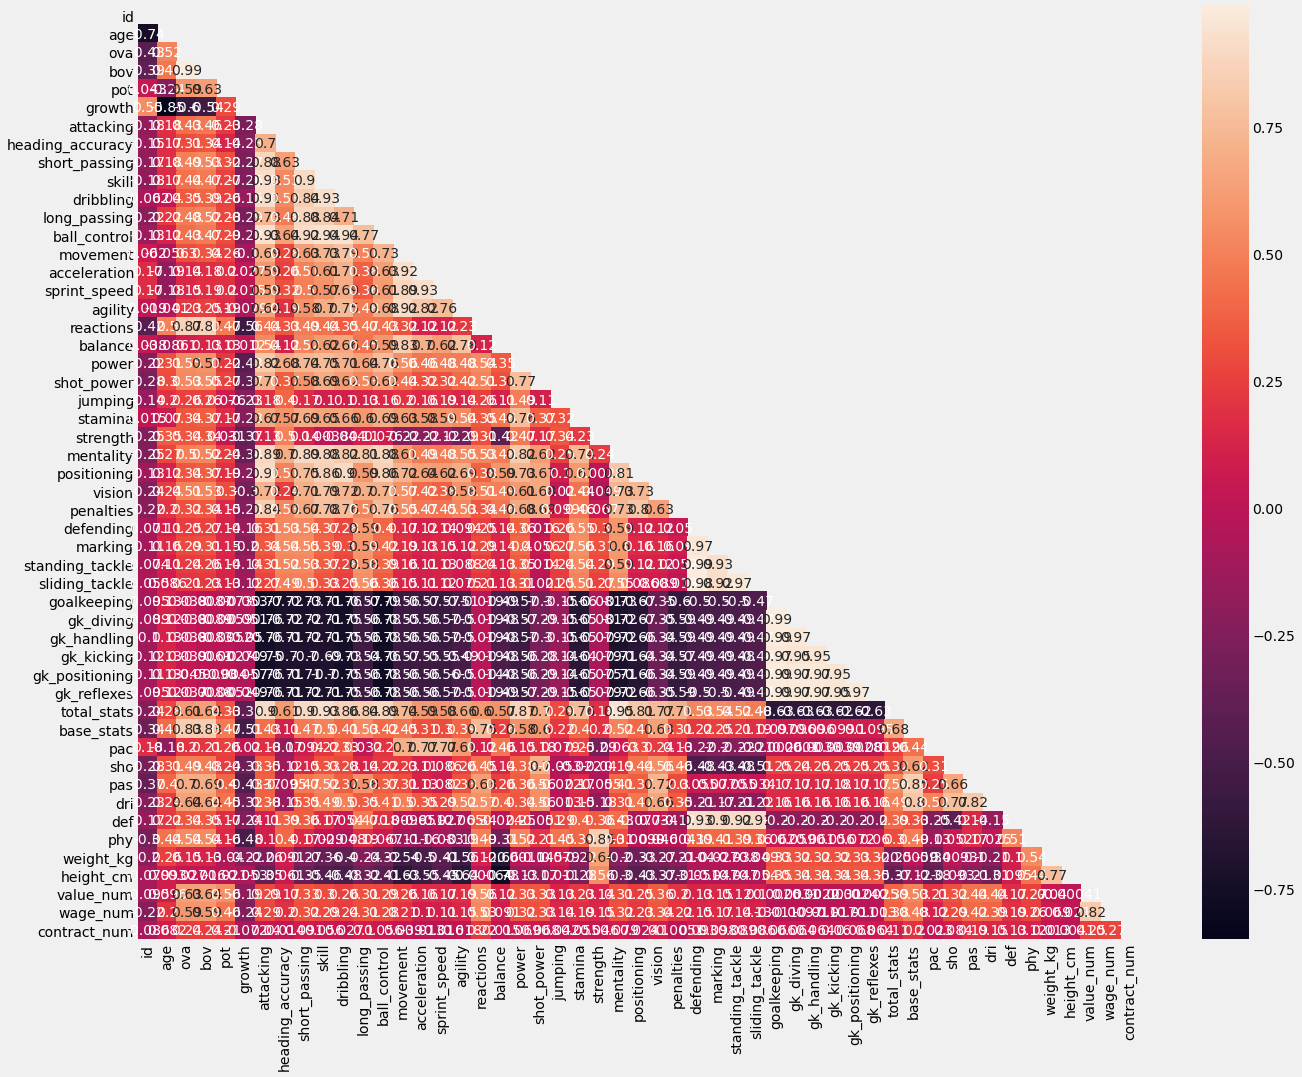

In [378]:
mask = np.zeros_like(X_num_matrix)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(X_num_matrix, mask=mask, annot=True)

plt.show()

drop the columns with a correlation > 0.9 

In [381]:
df_num = df_num.drop(["drop", "bov", "attacking", "short_passing", "skill",	"dribbling", "ball_control",
"movement", "acceleration", "sprint_speed", "agility",
"mentality", "defending", "marking", "standing_tackle", "sliding_tackle",
"goalkeeping", "gk_diving", "gk_handling", "gk_kicking", "gk_positioning", "gk_reflexes", "total_stats", "def"],  axis=1, inplace=True)

KeyError: "['drop'] not found in axis"

In [382]:
y = df_num['value_num']
x = df_num.drop(['value_num'], axis=1)
x = sm.add_constant(x)
x_num = x.select_dtypes(include = np.number)
x_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())

# R-squared 0,753

                            OLS Regression Results                            
Dep. Variable:              value_num   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:07:56   Log-Likelihood:            -2.7770e+05
No. Observations:               17125   AIC:                         5.555e+05
Df Residuals:                   17078   BIC:                         5.559e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.021e+07   1.22e+06  

# 7. PROCESSING

## 7.1.dealing with outliers

In [318]:
def boxcox_transform(df): 
    numeric_cols = df.select_dtypes(np.number).columns 
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols: 
        df[column] = np.where(df[column]<=0, np.NAN, df[column])
        df[column] = df[column].fillna(df[column].mean())
        transformed_df, ci = stats.boxcox(df[column])
        df[column] = transformed_df 
        _ci[column] = [ci]
    return df, _ci
df, _ci = boxcox_transform(df)
df

id             name       age        ova  \
0      2.450613e+00      G. Pasquale  2.333615  58.848889   
1      1.771027e+03      Luis García  2.380795  60.507424   
2      8.999458e+03          J. Cole  2.333615  60.507424   
3      2.199606e+04         D. Yorke  2.369619  58.018831   
4      3.294619e+04          Iniesta  2.369619  68.770363   
...             ...              ...       ...        ...   
17120  2.110995e+16       A. Medioub  2.155150  54.693131   
17121  2.111045e+16       W. Rickard  2.059924  48.013556   
17122  2.111071e+16       C. Barrett  2.059924  48.013556   
17123  2.111324e+16   J. Gazibegović  2.110516  53.026877   
17124  2.111425e+16  Pablo Rodríguez  2.059924  50.523026   

                 nationality           club        bov   bp  \
0                      Italy        Udinese  56.738223  LWB   
1                      Spain      KAS Eupen  55.975537   CM   
2                    England  Coventry City  56.738223  CAM   
3      Trinidad &amp; Tobago     Sunderland  55.975537   ST   
4                      Spain    Vissel Kobe  65.084741  CAM   
...                      ...            ...        ...  ...   
17120                 France     CD Tondela  52.917746   CB   
17121                  Wales        Burnley  46.765866  CAM   
17122                England        Burnley  45.219710   RB   
17123     Bosnia Herzegovina  SK Sturm Graz  49.848127   RB   
17124                  Spain          Lecce  49.078782   ST   

                                 position        pot   foot    growth  \
0                                      LM  13.172802   Left  4.584237   
1                              CM CAM CDM  13.376923  Right  4.584237   
2                            CAM RM RW LM  13.376923  Right  4.584237   
3      df.position.value_counts().head(1)  14.448024  Right  7.071382   
4                                  CM CAM  14.353973  Right  4.584237   
...                                   ...        ...    ...       ...   
17120                                  CB  13.172802  Right  2.854077   
17121                              CAM CM  12.860569  Right  5.370950   
17122                                  RB  12.965478  Right  5.815220   
17123                               RB LB  13.577977  Right  5.815220   
17124                                  ST  13.677395  Right  7.468786   

          attacking  heading_accuracy  short_passing         skill  \
0      56934.043922        623.109242   14332.041639  21126.604194   
1      66139.801903        659.693264   16939.287403  24768.294488   
2      66139.801903        334.145282   17491.941822  27001.185770   
3      40306.154688        641.293042   19213.448114  12677.794057   
4      78631.537298        535.474429   25658.655081  29714.856059   
...             ...               ...            ...           ...   
17120  22256.113947        754.905193    5203.354520   7652.062207   
17121  35504.899041        469.376742   11106.975306  13500.327848   
17122  27333.290624        518.612227    3947.341106   9071.620104   
17123  28620.100370        501.974378    9478.877251  12949.396401   
17124  37269.199979        623.109242    4676.261398  10933.406762   

         dribbling  long_passing  ball_control       movement  acceleration  \
0      3509.565771    799.195128  14162.192412  712496.156462   3459.596157   
1      3122.648141    839.115074  14162.192412  518895.289657   2297.446850   
2      4133.894547    799.195128  17835.988029  478077.050523   1659.915979   
3      3029.567954    702.942079  17280.310143  134343.664473   2564.666312   
4      4811.233903   1095.221455  25335.993051  707460.394125   2751.413149   
...            ...           ...           ...            ...           ...   
17120  1228.717903    238.750723   7912.383908  296840.148244   1965.099151   
17121  2101.468012    647.658808   7237.102439  490114.492657   2751.413149   
17122  1737.266577    263.244600   5148.249830  531529.063499   3248.561947   
17123  1951.486232 

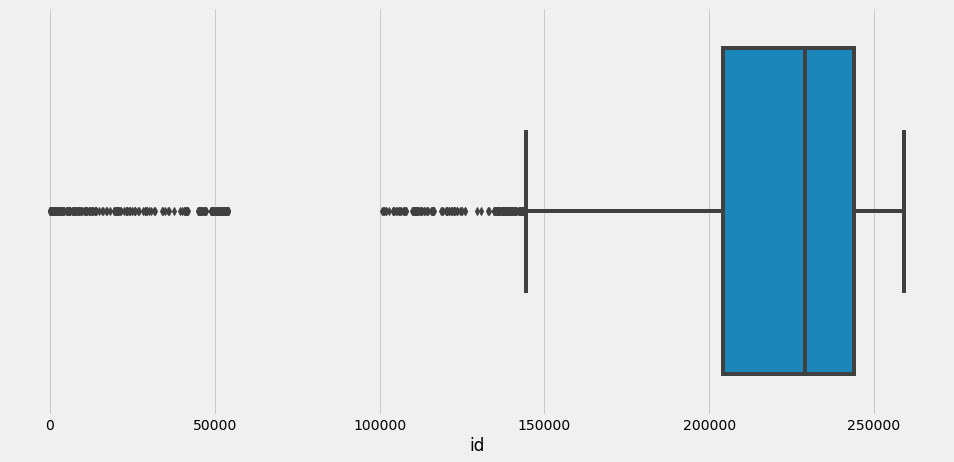

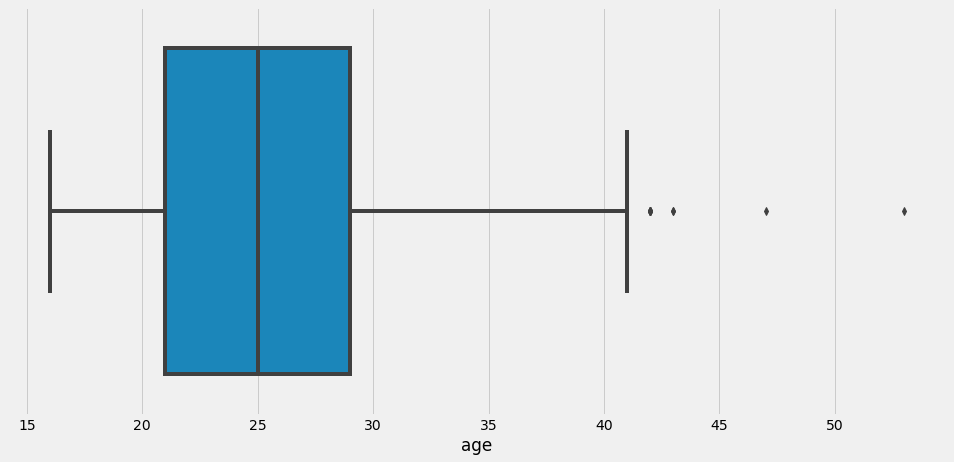

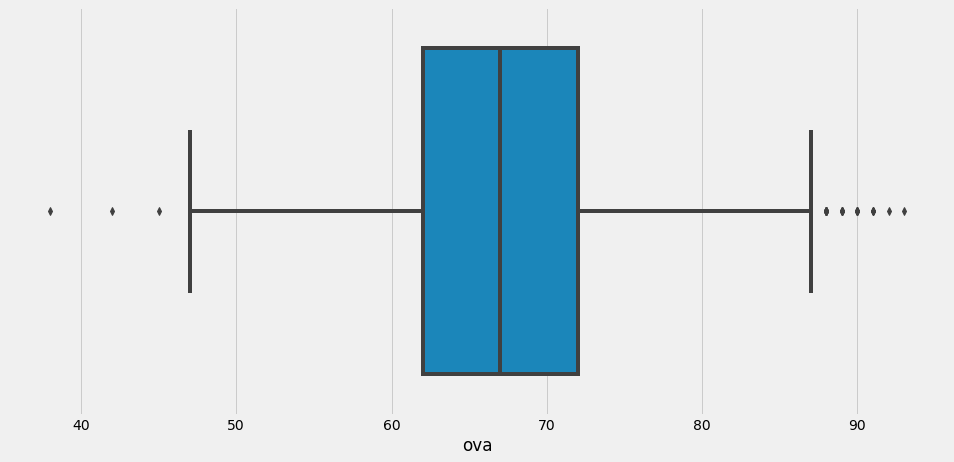

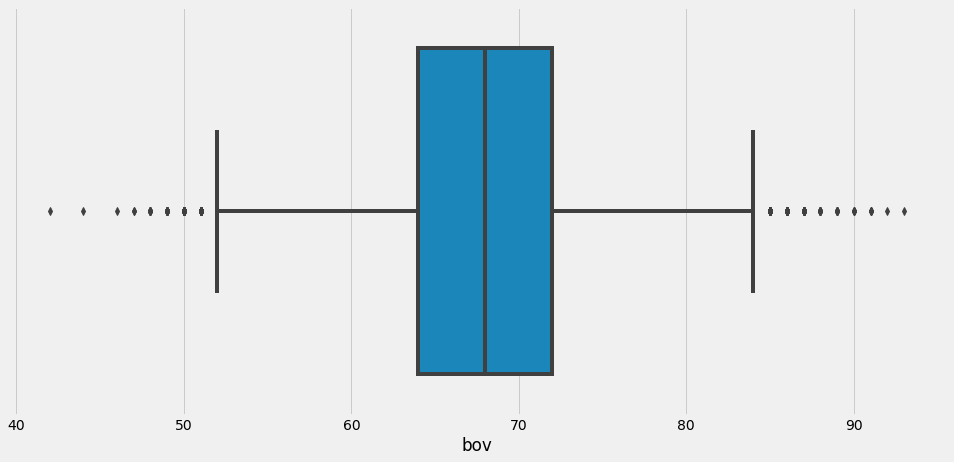

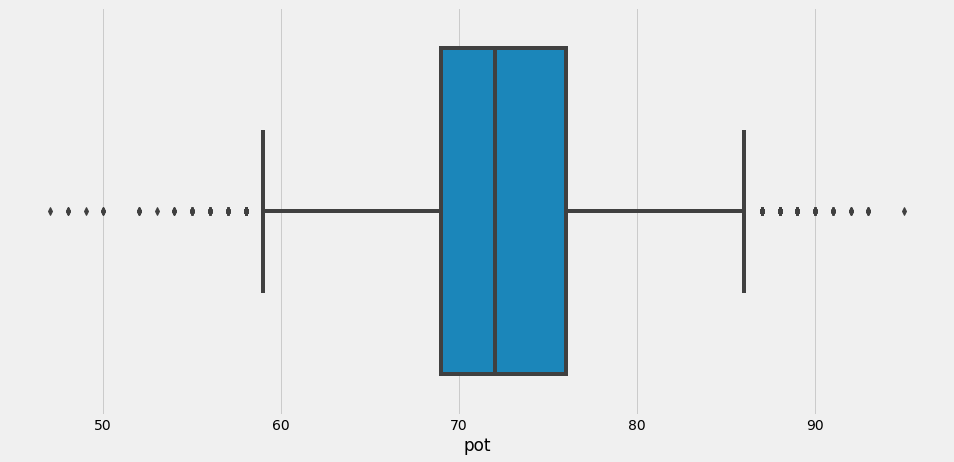

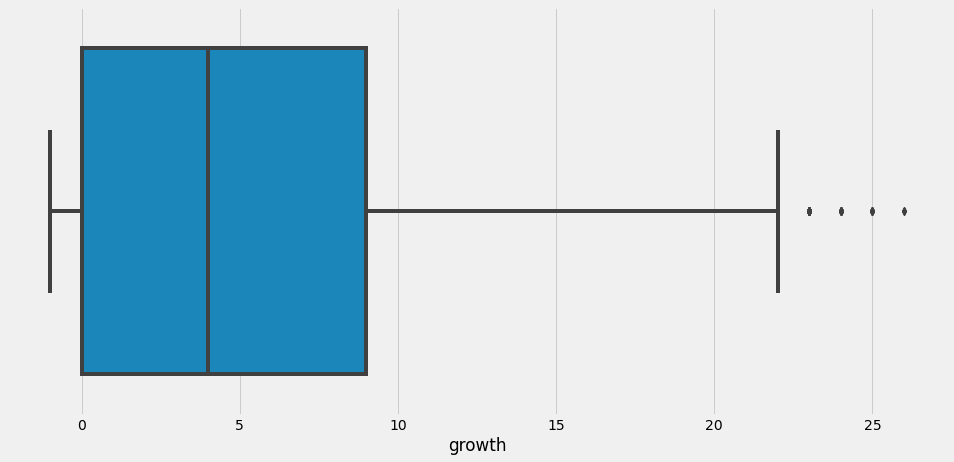

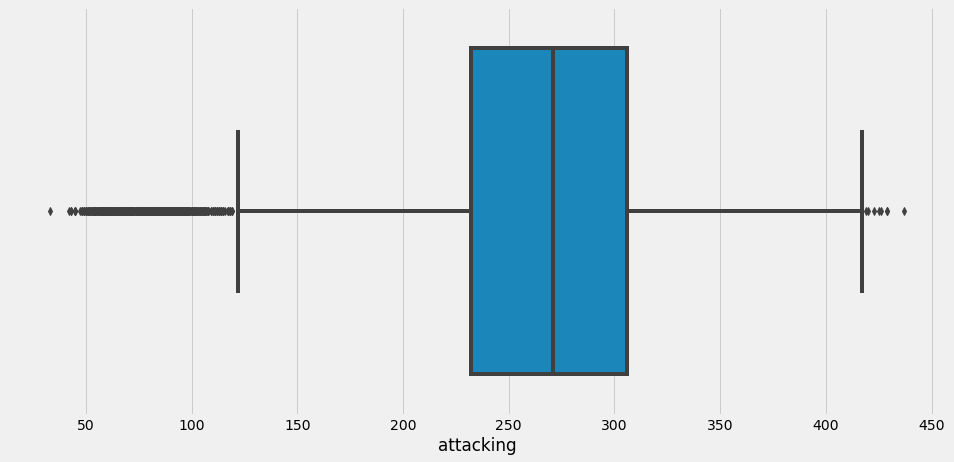

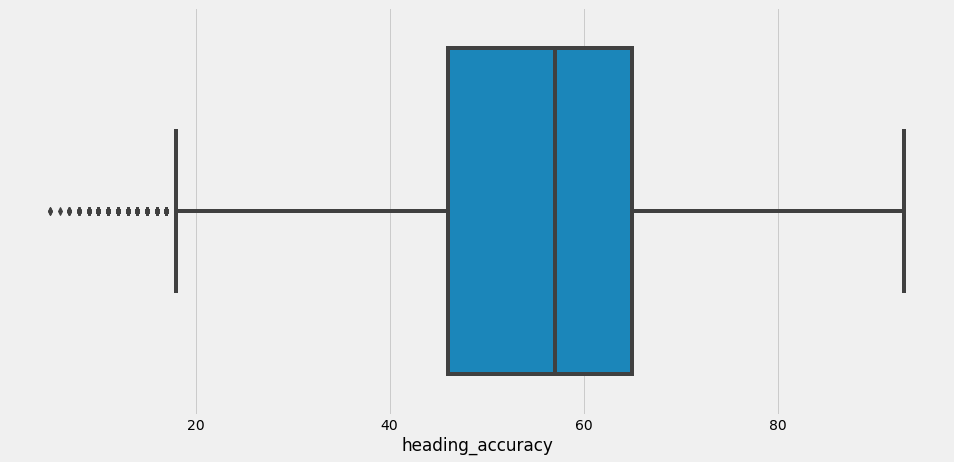

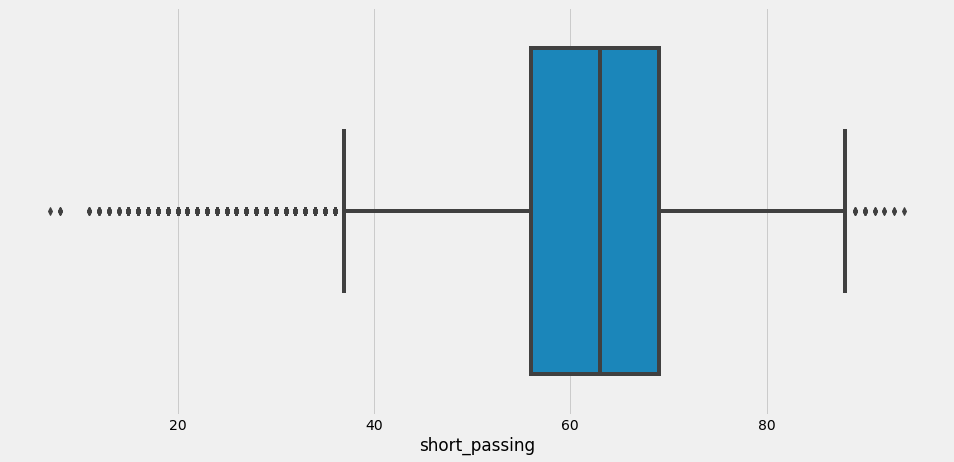

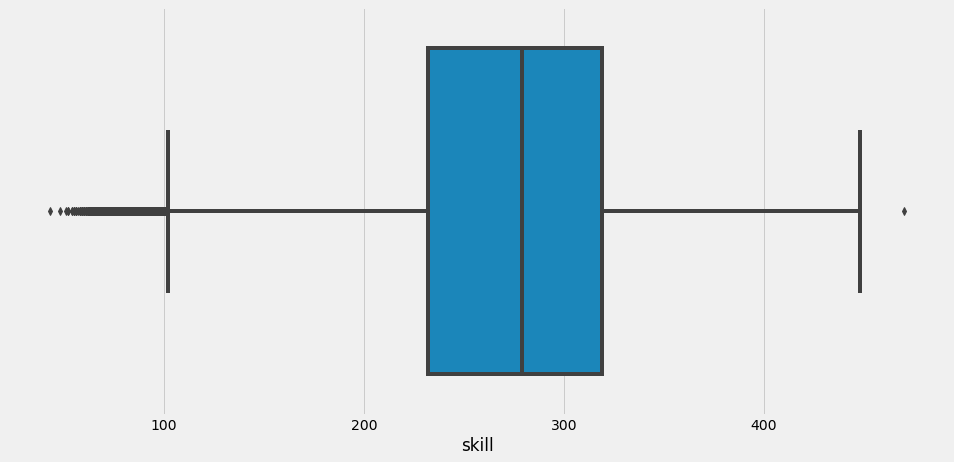

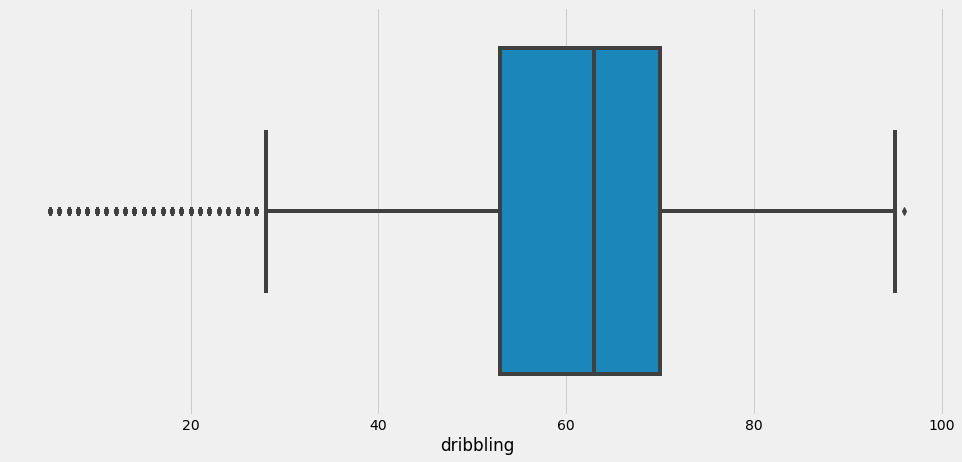

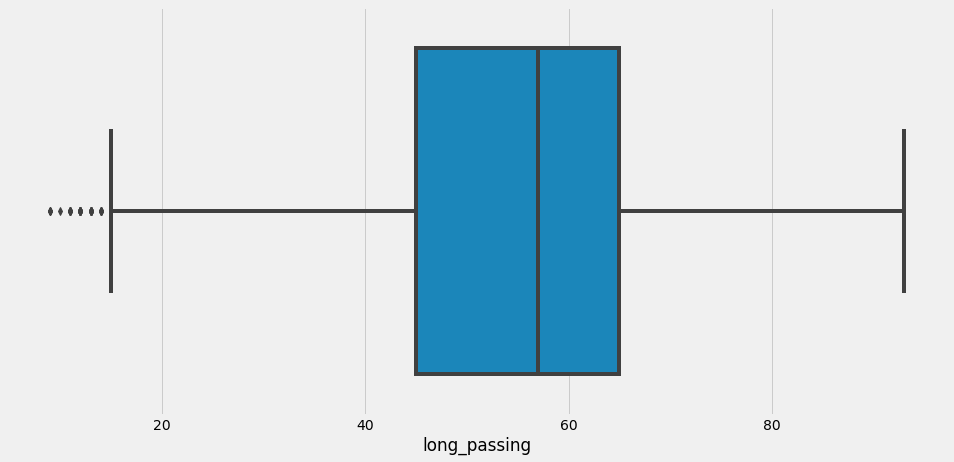

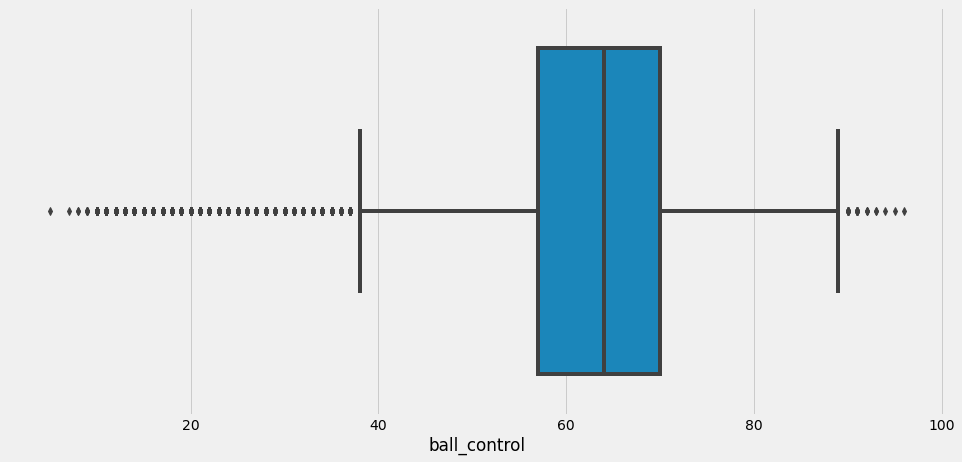

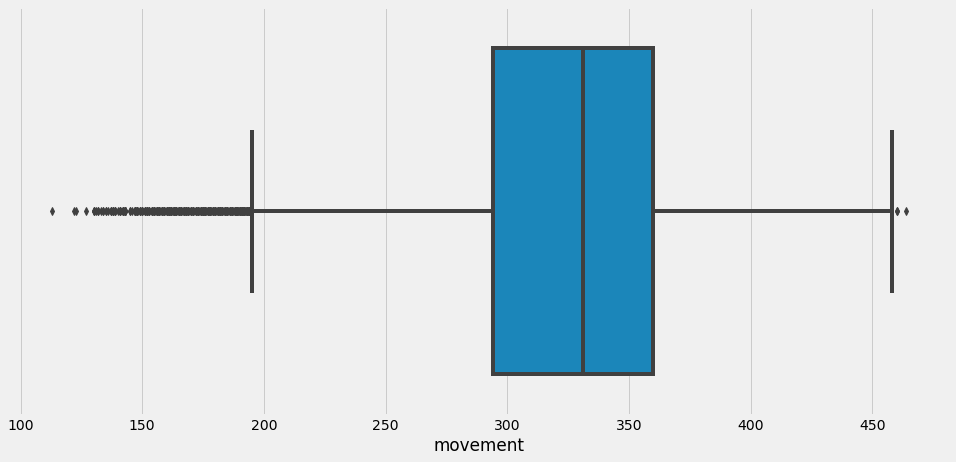

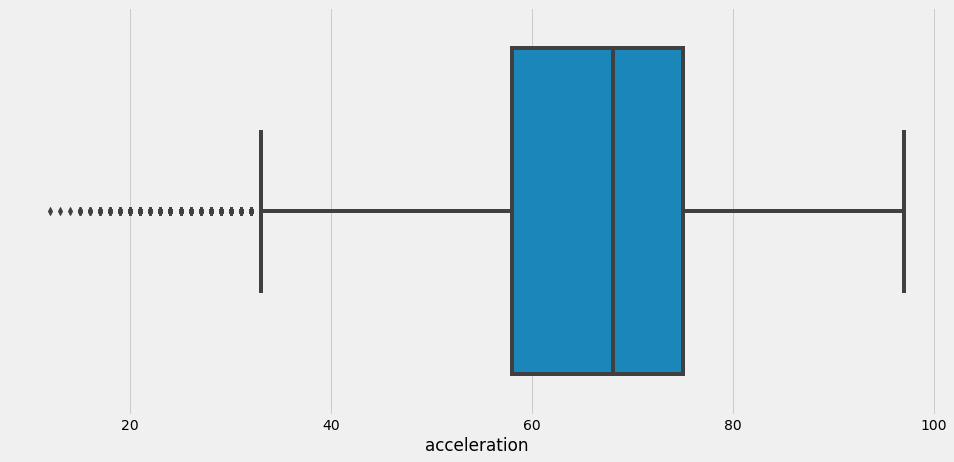

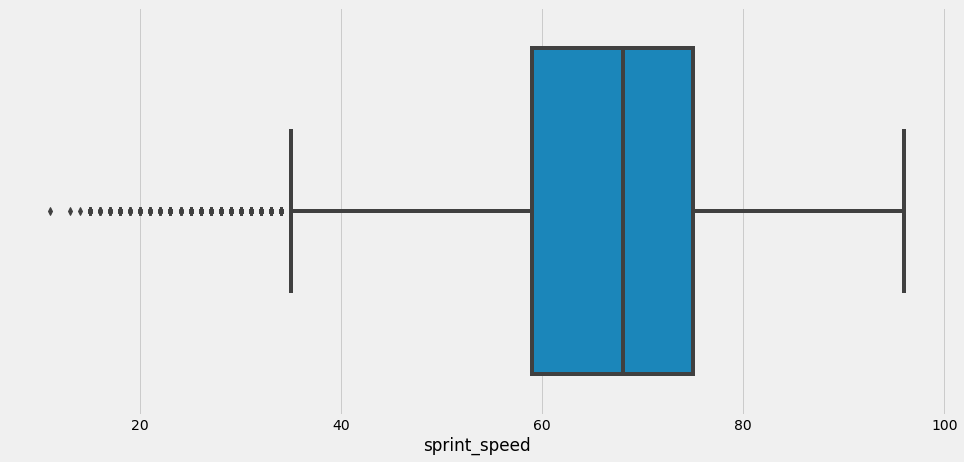

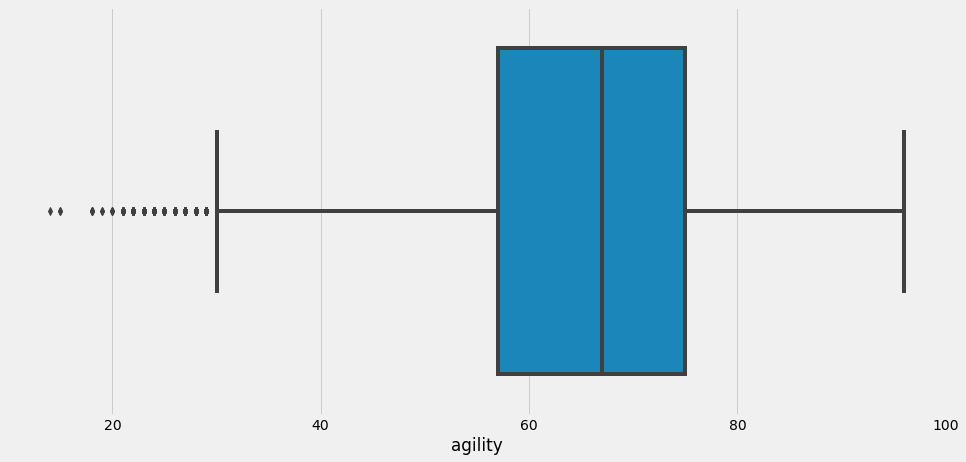

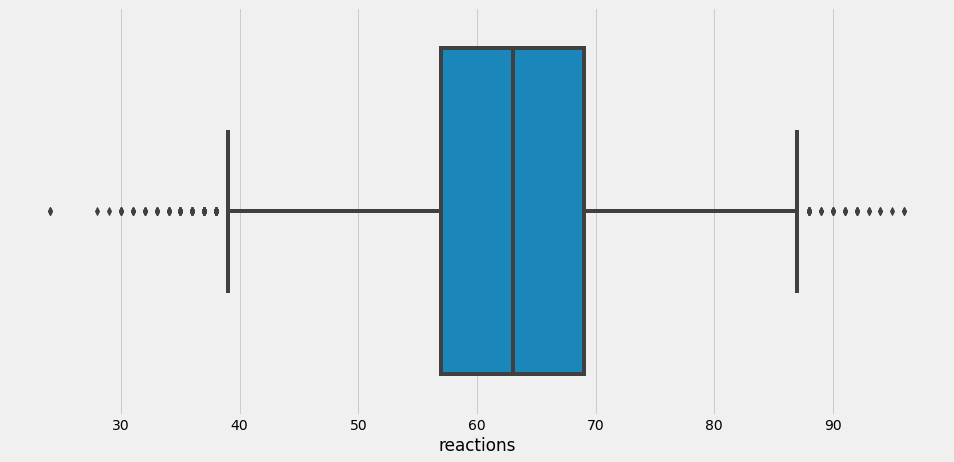

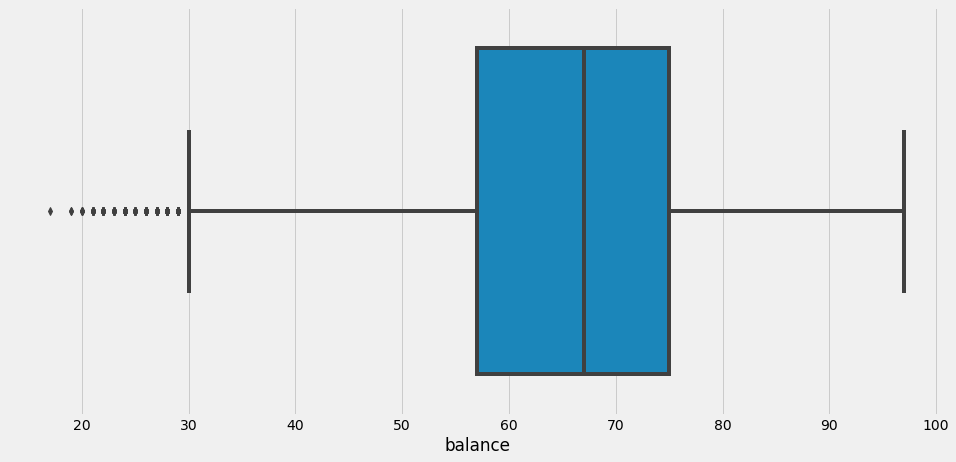

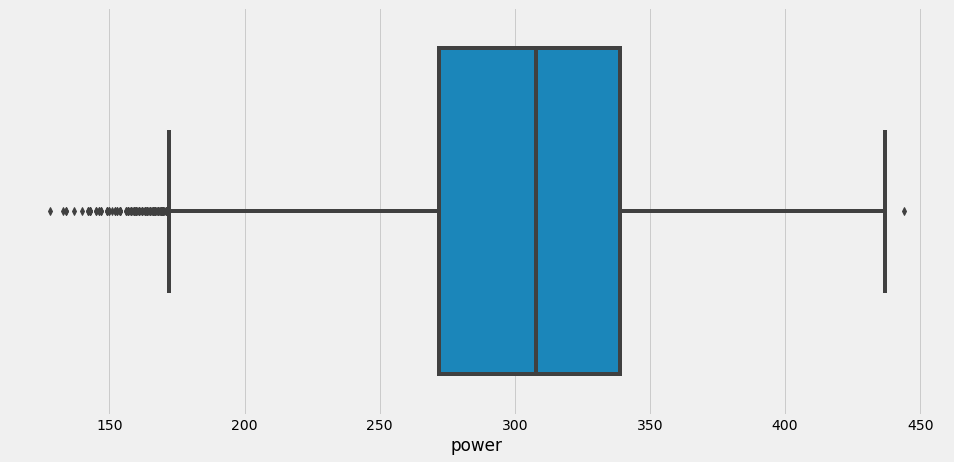

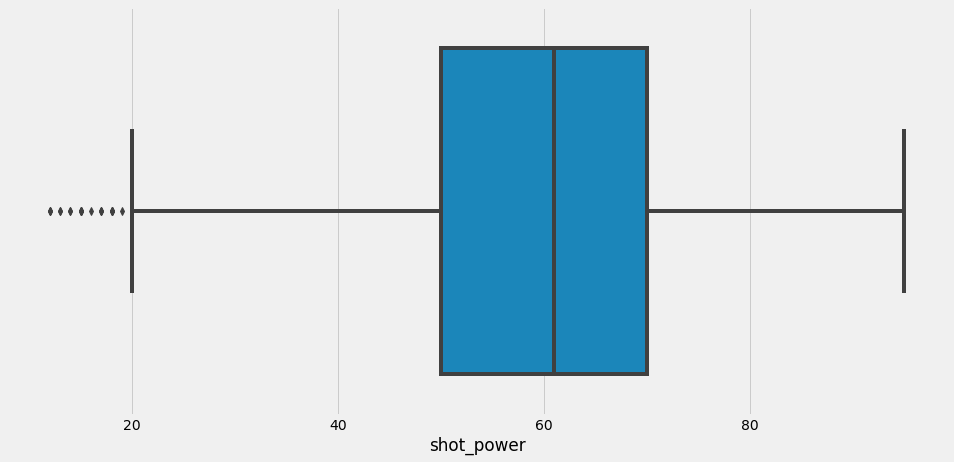

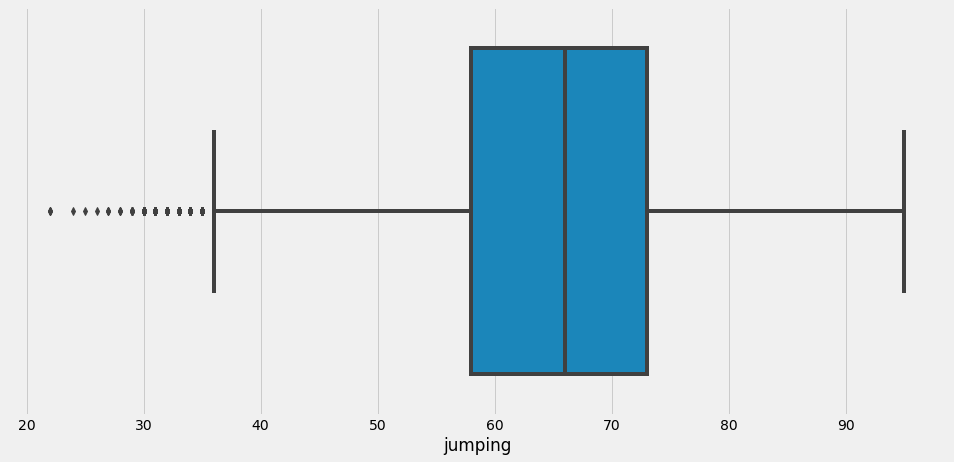

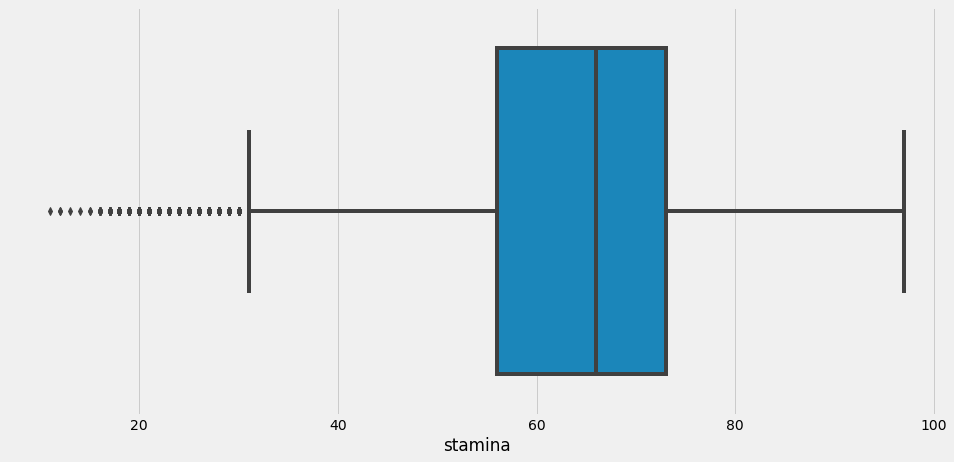

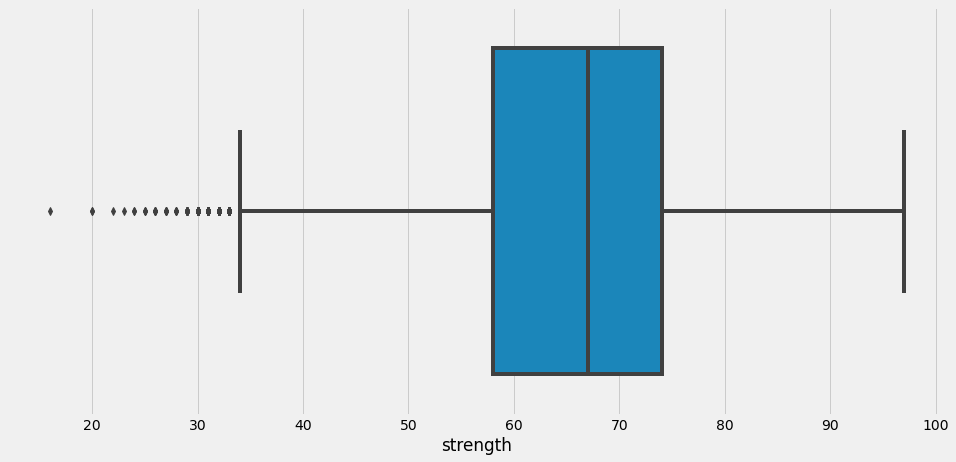

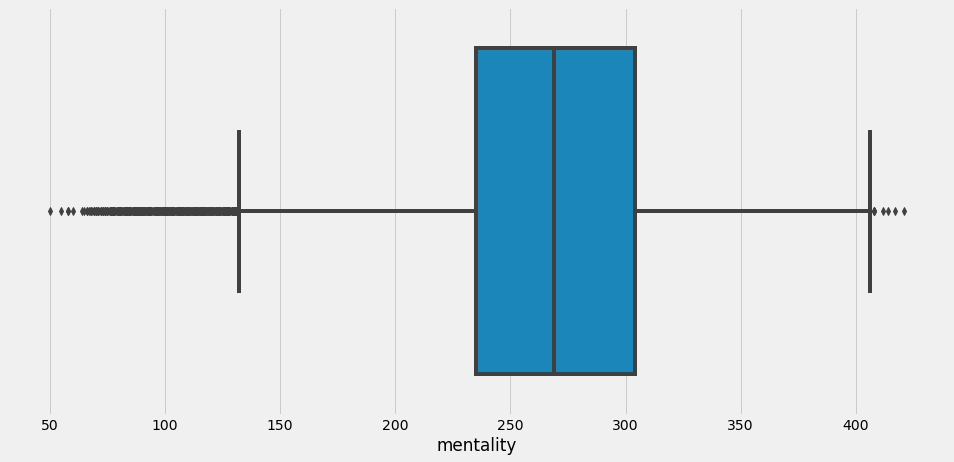

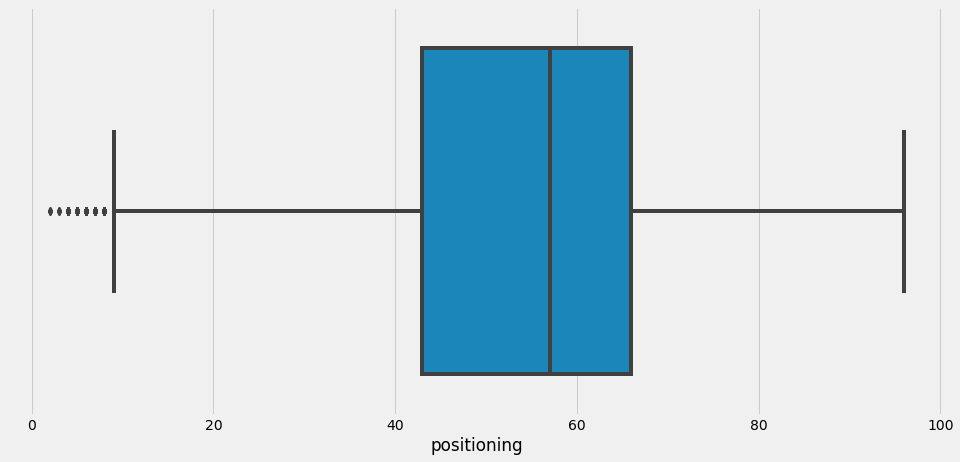

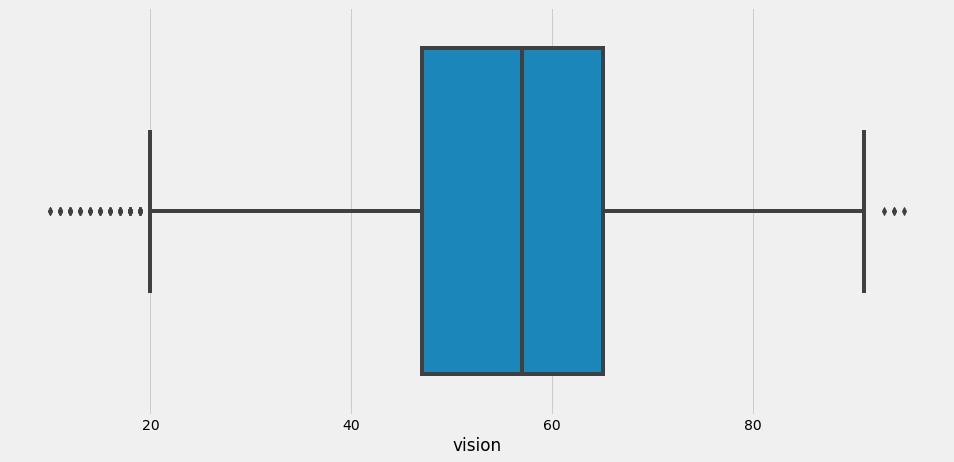

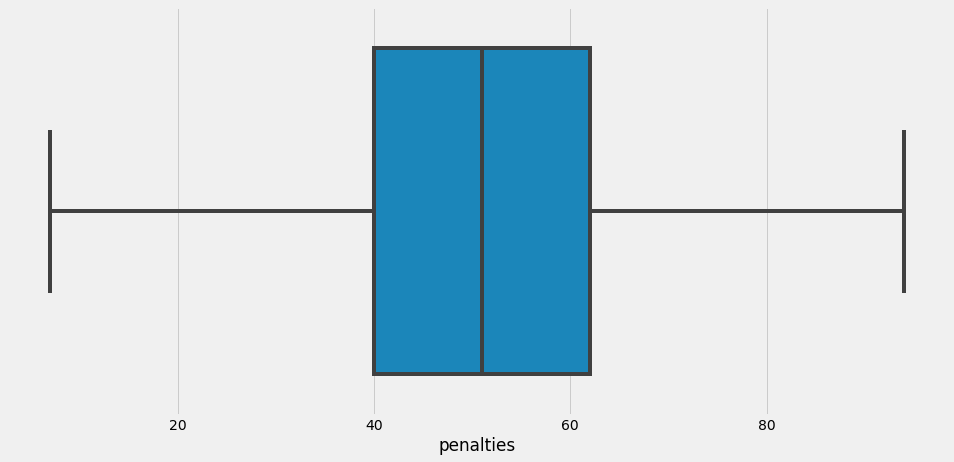

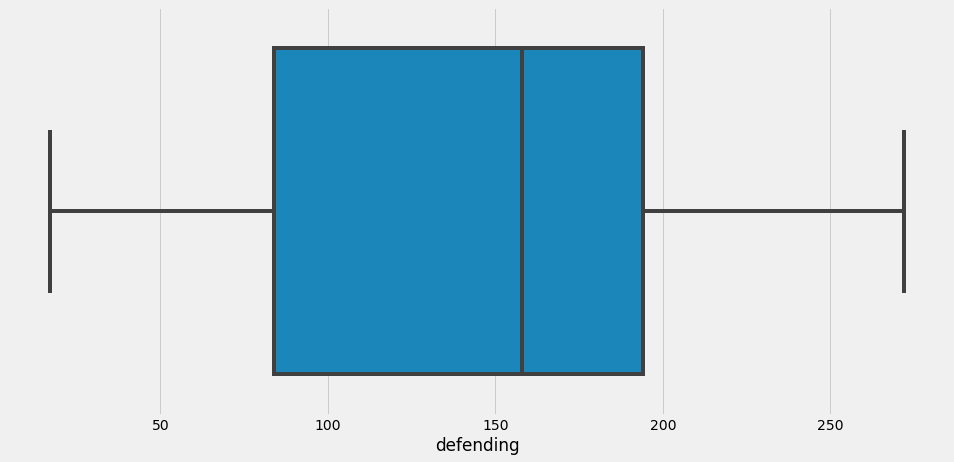

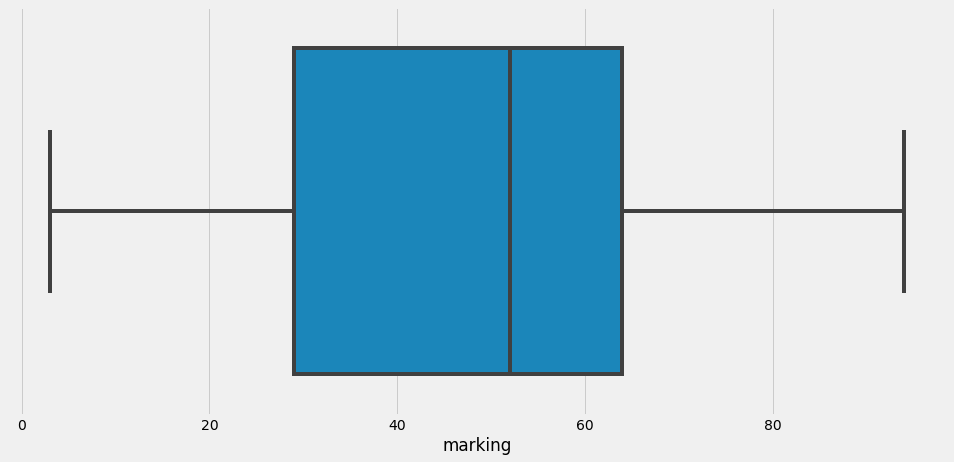

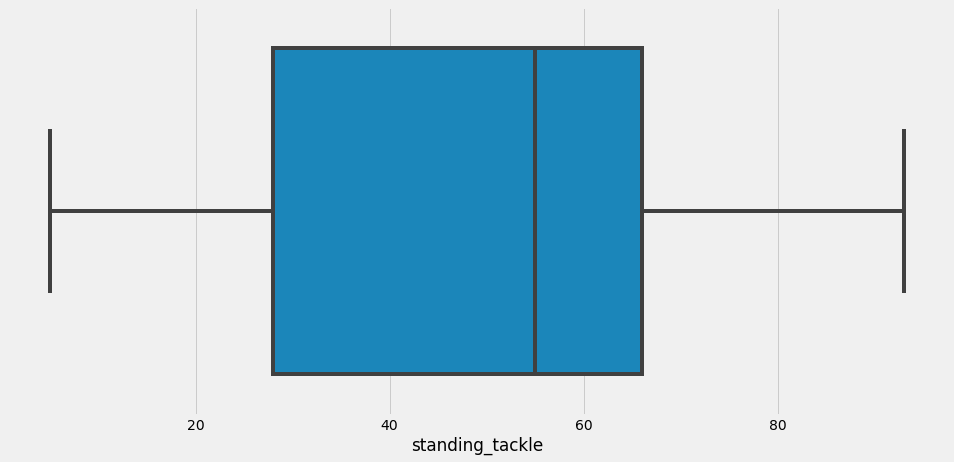

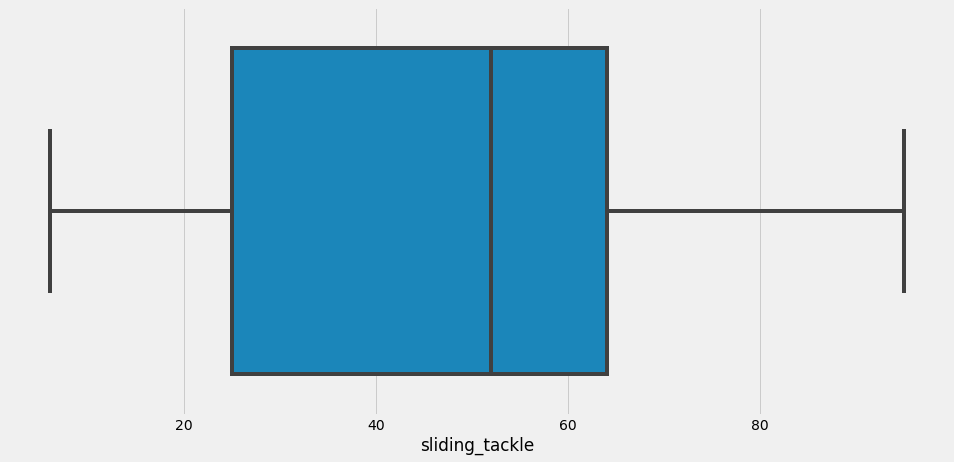

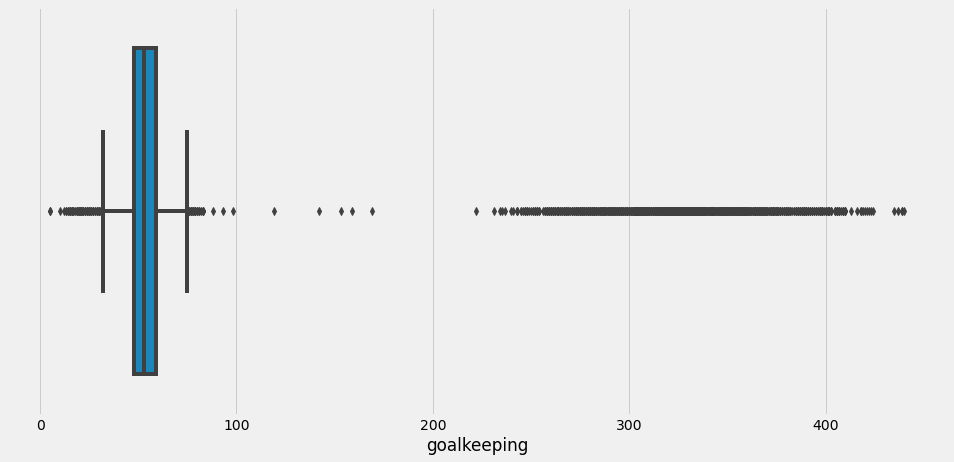

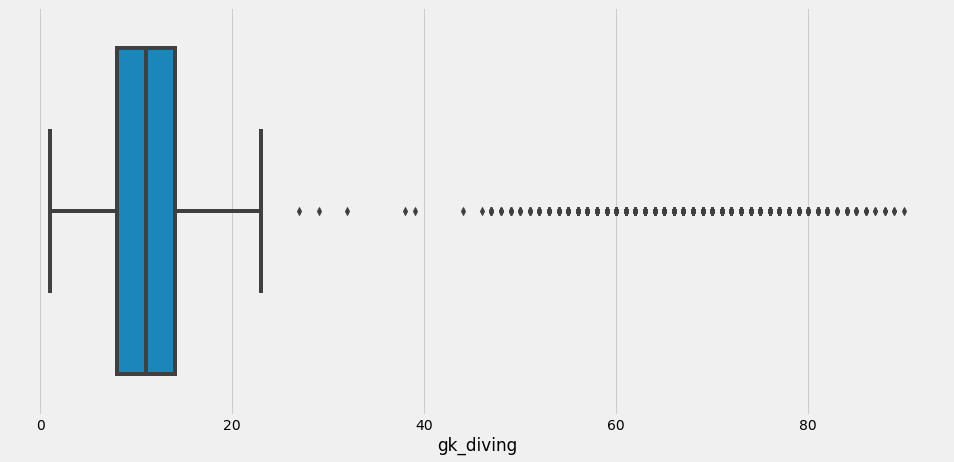

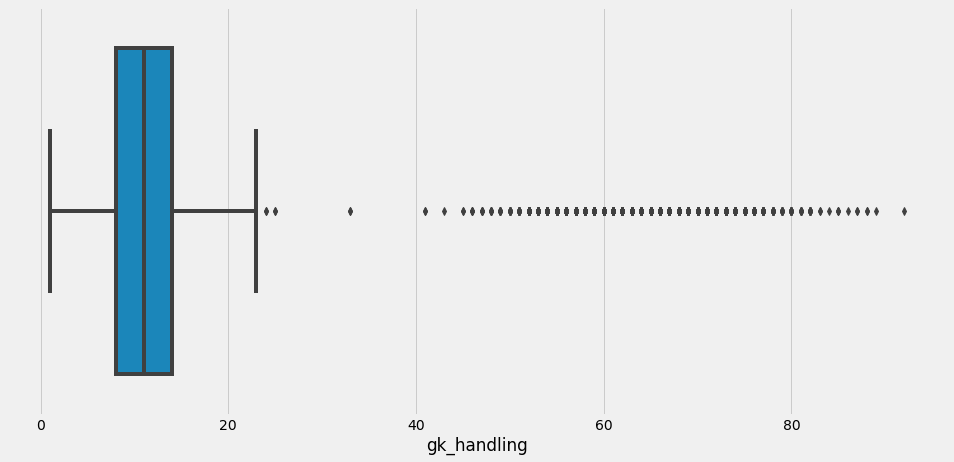

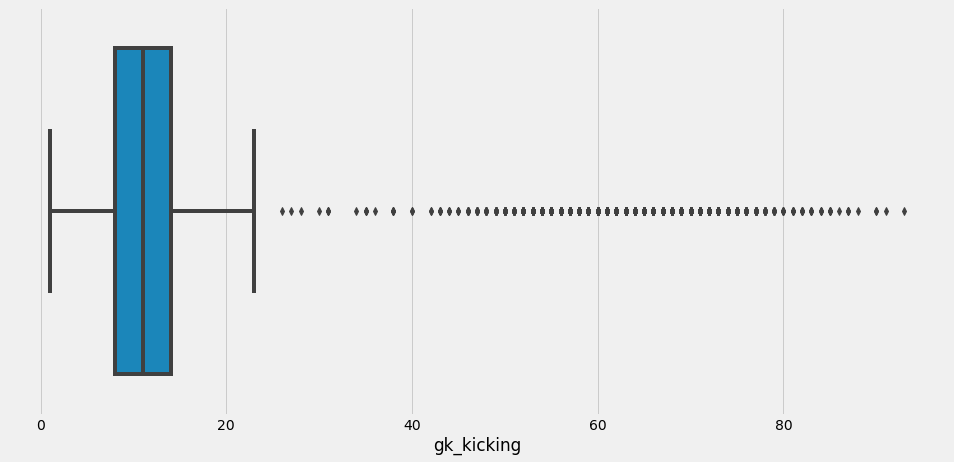

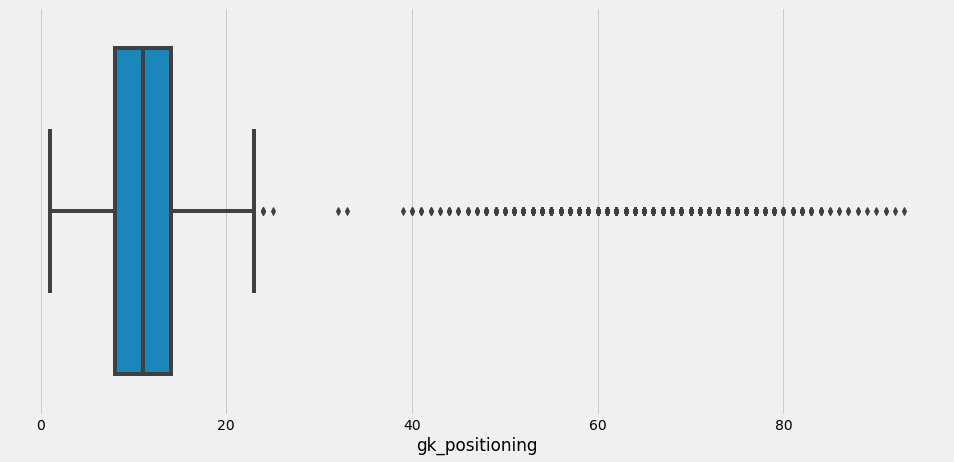

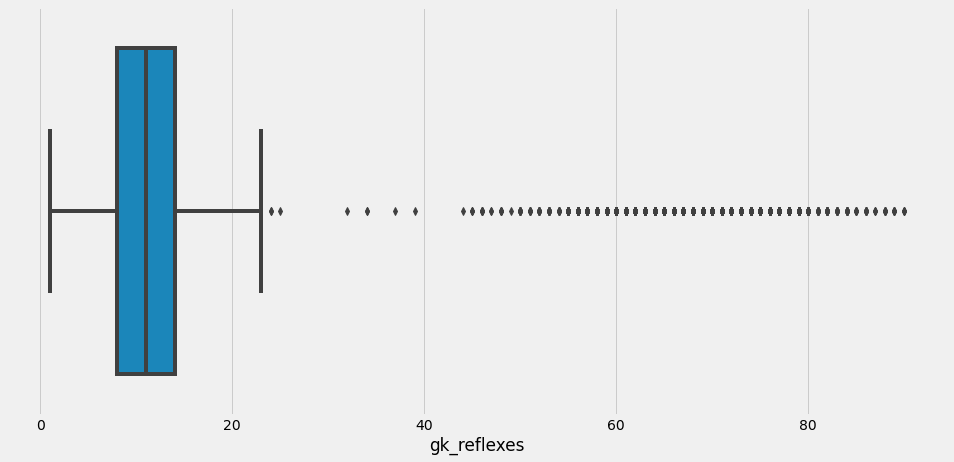

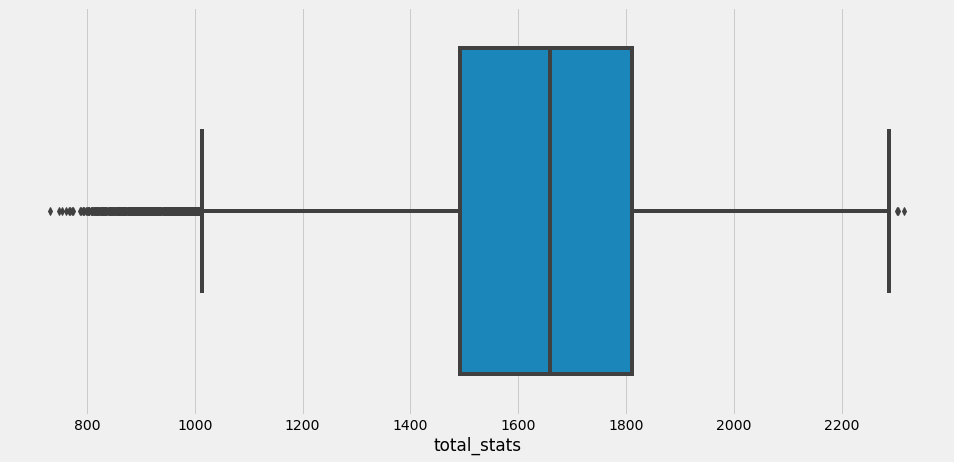

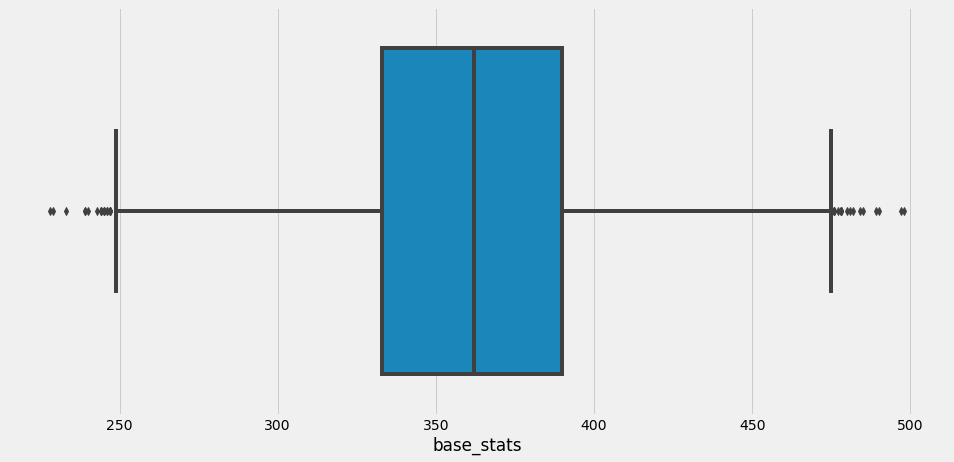

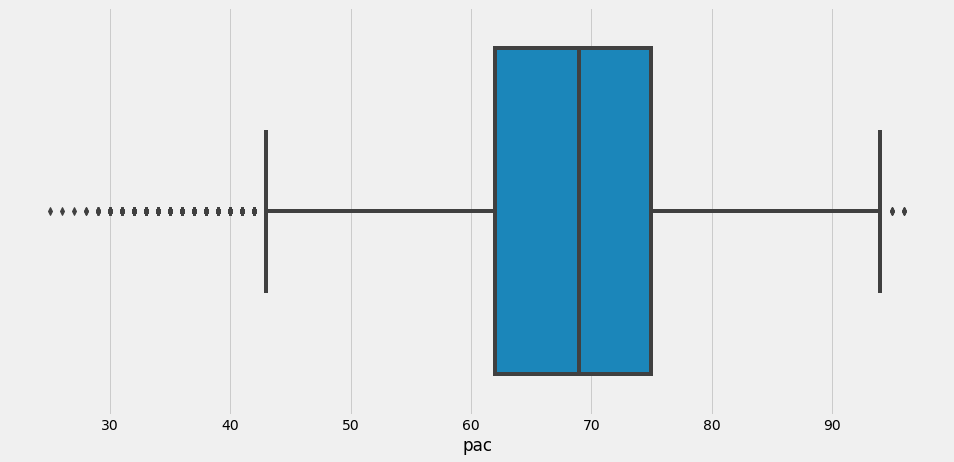

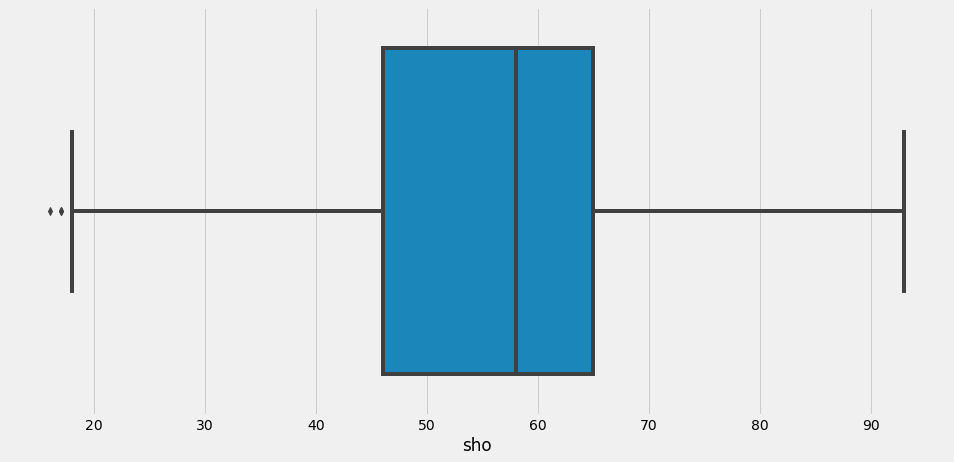

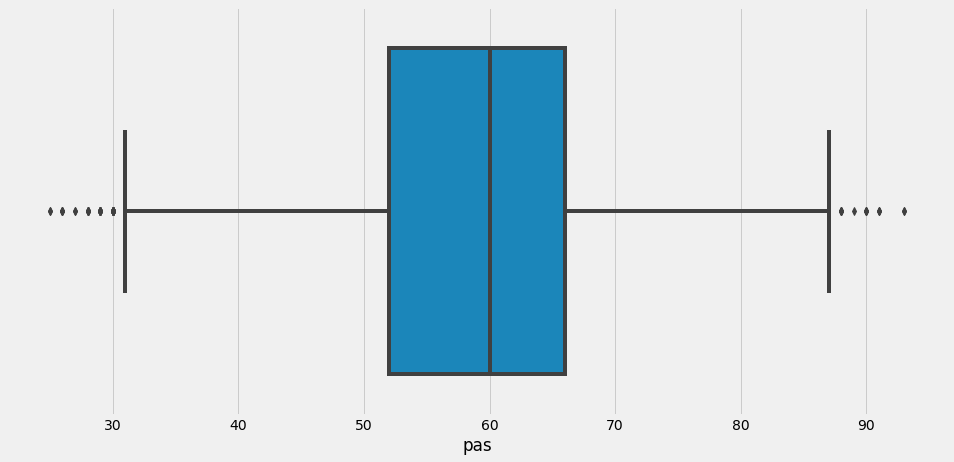

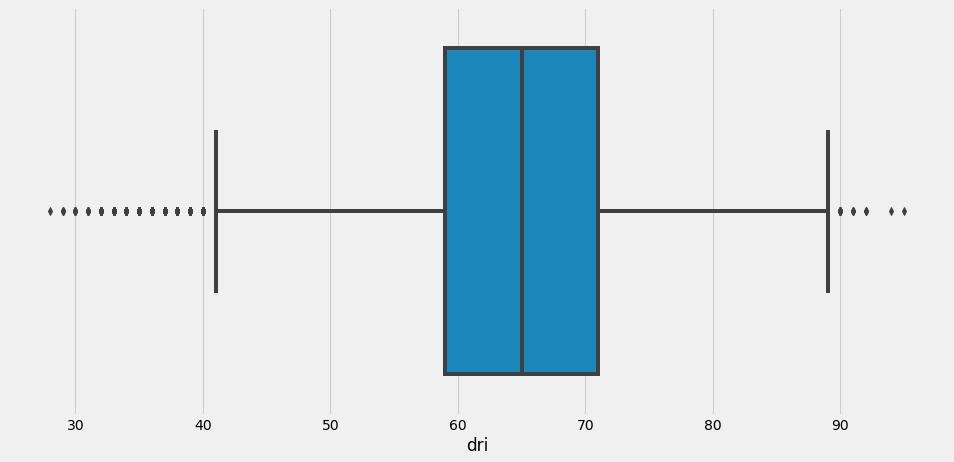

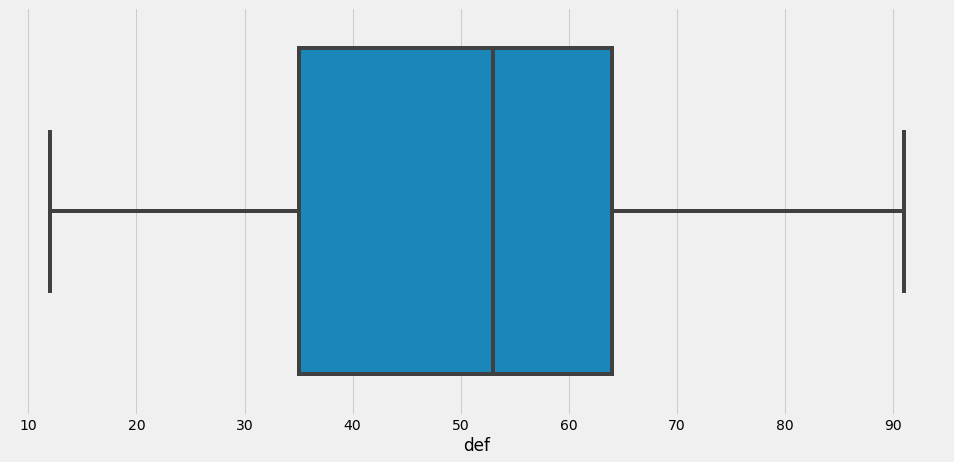

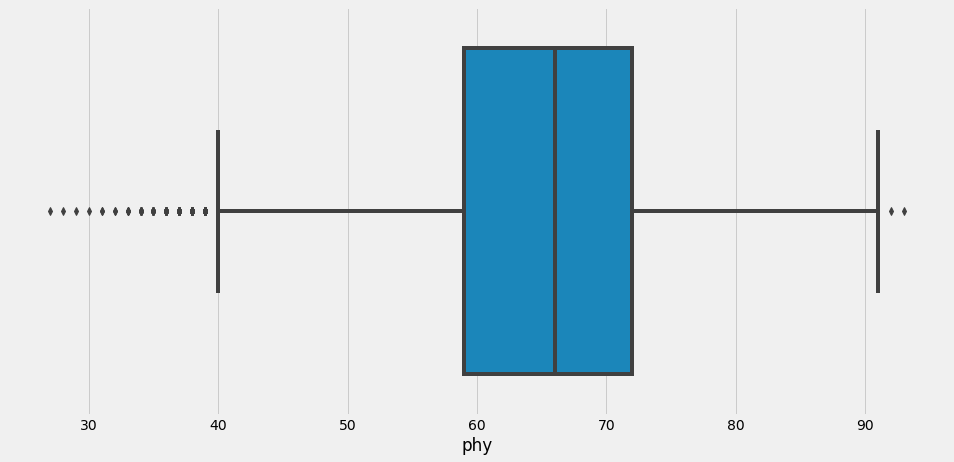

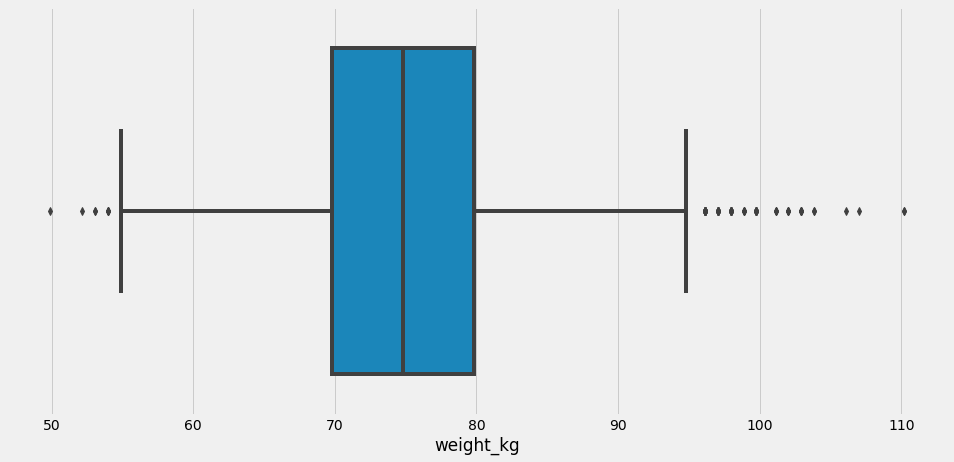

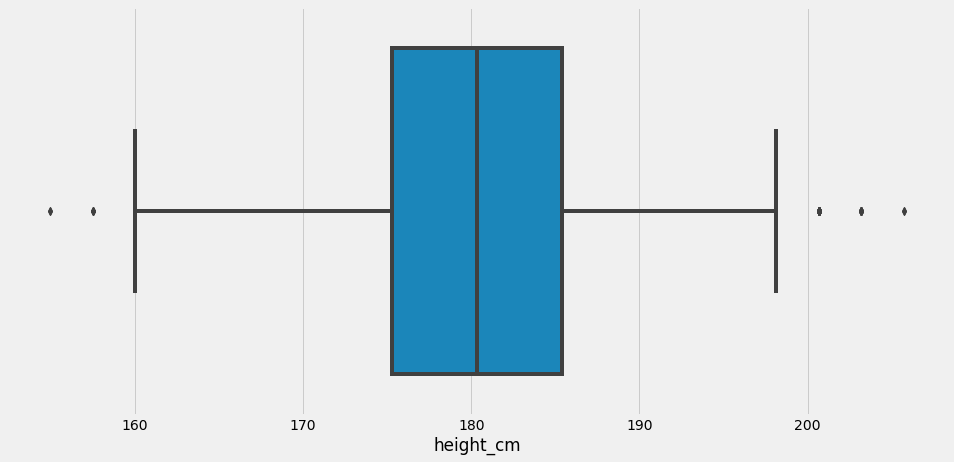

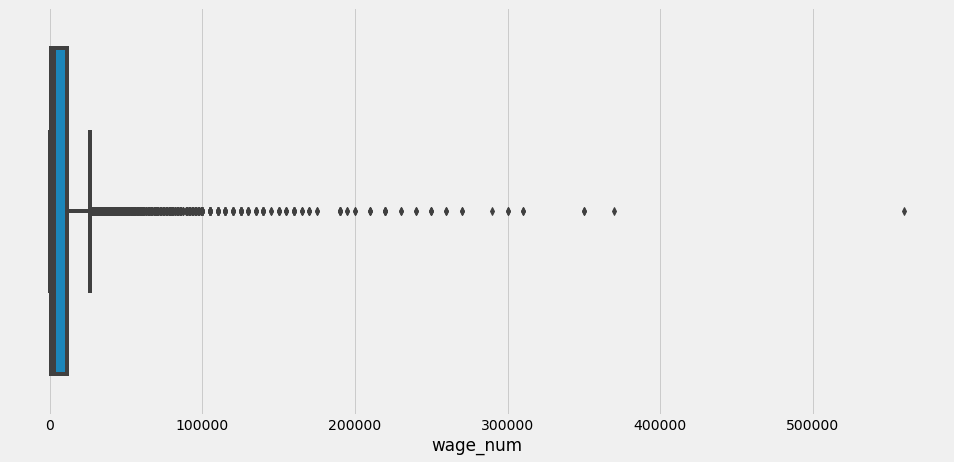

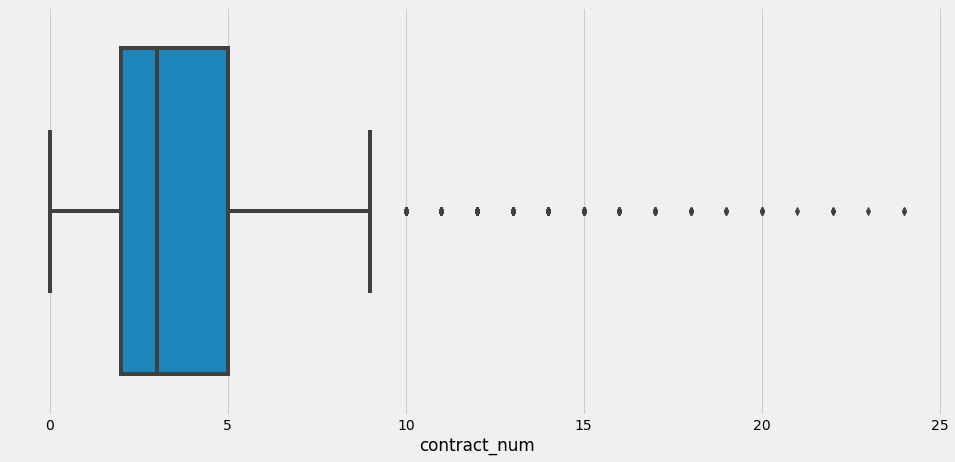

In [319]:
for column in df_num.columns.drop("value_num"):
    sns.boxplot(df_num[column])
    plt.show()

delete the outliers

In [320]:
iqr_list = []

for column in df_num.columns:
    iqr = np.percentile(df_num[column],75) - np.percentile(df_num[column],25) 
    iqr_list.append(iqr)

iqr_list = [round(i,2) for i in iqr_list]
print(iqr_list)

[39829.0, 8.0, 10.0, 8.0, 7.0, 9.0, 74.0, 19.0, 13.0, 87.0, 17.0, 20.0, 13.0, 66.0, 17.0, 16.0, 18.0, 12.0, 18.0, 67.0, 20.0, 15.0, 17.0, 16.0, 69.0, 23.0, 18.0, 22.0, 110.0, 35.0, 38.0, 39.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 320.0, 57.0, 13.0, 19.0, 14.0, 12.0, 29.0, 13.0, 9.98, 10.16, 2025000.0, 10000.0, 3.0]


In [321]:
upper_limit_list = []
lower_limit_list = []

for column in df_num.columns: 
    upper_limit = np.percentile(df[column],75) + 1.5*iqr
    upper_limit_list.append(upper_limit)
    lower_limit = np.percentile(df[column],25) - 1.5*iqr
    lower_limit_list.append(lower_limit)

upper_limit_list = [round(i,2) for i in upper_limit_list]  
lower_limit_list = [round(i,2) for i in lower_limit_list]    
    
print("upper_limit:" ,upper_limit_list) 
print("lower_limit:", lower_limit_list)

upper_limit: [1.7500400177021922e+16, 6.78, 65.84, 62.0, 18.37, 9.41, 54385.18, 739.94, 13365.26, 19028.13, 3221.69, 726.28, 13682.41, 779904.78, 4257.91, 4829.36, 2370.82, 214.41, 1932.96, 84848.18, 545.23, 1078.51, 3289.56, 965.59, 62071.44, 471.47, 342.35, 172.85, 204.38, 83.74, 81.45, 57.99, 5.53, 5.69, 5.69, 5.7, 5.68, 5.68, 14741950.99, 572.64, 2752.82, 535.51, 265.56, 4187.37, 75.73, 3177.28, 10.0, 120.9, 14.24, 10.95, 6.38]
lower_limit: [1.0058279020032e+16, -2.37, 48.53, 46.88, 8.67, -1.09, 31007.53, 402.43, 7996.91, 10677.26, 1802.74, 380.86, 8258.98, 474099.47, 2469.38, 2881.97, 1379.16, 158.1, 1139.88, 53744.52, 311.85, 712.05, 1900.41, 627.07, 36549.2, 232.9, 203.58, 90.06, 80.89, 28.92, 26.17, 16.8, -3.47, -3.41, -3.42, -3.41, -3.42, -3.42, 9407087.02, 474.7, 1875.63, 298.64, 181.78, 2812.96, 33.13, 2103.26, 0.79, 106.15, 4.46, 1.12, -3.76]


In [322]:
df_num = df_num[(df_num['id']>lower_limit_list[0]) & (df_num['id']<upper_limit_list[0])]
df_num = df_num[(df_num['age']>lower_limit_list[1]) & (df_num['age']<upper_limit_list[1])]
df_num = df_num[(df_num['ova']>lower_limit_list[2]) & (df_num['ova']<upper_limit_list[2])]
df_num = df_num[(df_num['bov']>lower_limit_list[3]) & (df_num['bov']<upper_limit_list[3])]
df_num = df_num[(df_num['pot']>lower_limit_list[4]) & (df_num['pot']<upper_limit_list[4])]
df_num = df_num[(df_num['growth']>lower_limit_list[5]) & (df_num['growth']<upper_limit_list[5])]
df_num = df_num[(df_num['attacking']>lower_limit_list[6]) & (df_num['attacking']<upper_limit_list[6])]
df_num = df_num[(df_num['heading_accuracy']>lower_limit_list[7]) & (df_num['heading_accuracy']<upper_limit_list[7])]
df_num = df_num[(df_num['short_passing']>lower_limit_list[8]) & (df_num['short_passing']<upper_limit_list[8])]
df_num = df_num[(df_num['skill']>lower_limit_list[9]) & (df_num['skill']<upper_limit_list[9])]
df_num = df_num[(df_num['dribbling']>lower_limit_list[10]) & (df_num['dribbling']<upper_limit_list[10])]
df_num = df_num[(df_num['long_passing']>lower_limit_list[11]) & (df_num['long_passing']<upper_limit_list[11])]
df_num = df_num[(df_num['ball_control']>lower_limit_list[12]) & (df_num['ball_control']<upper_limit_list[12])]
df_num = df_num[(df_num['movement']>lower_limit_list[13]) & (df_num['movement']<upper_limit_list[13])]
df_num = df_num[(df_num['acceleration']>lower_limit_list[14]) & (df_num['acceleration']<upper_limit_list[14])]
df_num = df_num[(df_num['sprint_speed']>lower_limit_list[15]) & (df_num['sprint_speed']<upper_limit_list[15])]
df_num = df_num[(df_num['agility']>lower_limit_list[16]) & (df_num['agility']<upper_limit_list[16])]
df_num = df_num[(df_num['reactions']>lower_limit_list[17]) & (df_num['reactions']<upper_limit_list[17])]
df_num = df_num[(df_num['balance']>lower_limit_list[18]) & (df_num['balance']<upper_limit_list[18])]

In [323]:
df_num = df_num[(df_num['power']>lower_limit_list[19]) & (df_num['power']<upper_limit_list[19])]
df_num = df_num[(df_num['shot_power']>lower_limit_list[20]) & (df_num['shot_power']<upper_limit_list[20])]
df_num = df_num[(df_num['jumping']>lower_limit_list[21]) & (df_num['jumping']<upper_limit_list[21])]
df_num = df_num[(df_num['stamina']>lower_limit_list[22]) & (df_num['stamina']<upper_limit_list[22])]
df_num = df_num[(df_num['strength']>lower_limit_list[23]) & (df_num['strength']<upper_limit_list[23])]
df_num = df_num[(df_num['mentality']>lower_limit_list[24]) & (df_num['mentality']<upper_limit_list[24])]
df_num = df_num[(df_num['weight_kg']>lower_limit_list[26]) & (df_num['weight_kg']<upper_limit_list[26])]
df_num = df_num[(df_num['height_cm']>lower_limit_list[28]) & (df_num['height_cm']<upper_limit_list[28])]
df_num = df_num[(df_num['wage_num']>lower_limit_list[29]) & (df_num['wage_num']<upper_limit_list[29])]
df_num = df_num[(df_num['contract_num']>lower_limit_list[30]) & (df_num['contract_num']<upper_limit_list[30])]

## 7.2. train test split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7.3. standardise the data 

In [325]:
transformer = StandardScaler() 
transformer.fit(x_num)

x_standardized = transformer.transform(x_num)
x_standardized.shape
pd.DataFrame(x_standardized)

0         1         2         3         4         5         6   \
0      0.0 -5.850608  1.563385  0.296466  0.467024 -0.604843 -0.954629   
1      0.0 -5.850235  2.372689  0.587835  0.316361 -0.258209 -0.954629   
2      0.0 -5.849942  1.563385  0.587835  0.467024 -0.258209 -0.954629   
3      0.0 -5.849702  2.170363  0.150781  0.316361  1.648276  1.464432   
4      0.0 -5.849568  2.170363  2.044685  2.124313  1.474959 -0.954629   
...    ...       ...       ...       ...       ...       ...       ...   
17120  0.0  1.058701 -0.662199 -0.431959 -0.286290 -0.604843 -0.090678   
17121  0.0  1.058754 -1.471503 -1.597438 -1.491591 -1.124793  0.773272   
17122  0.0  1.058781 -1.471503 -1.597438 -1.792917 -0.951476  0.946062   
17123  0.0  1.059048 -1.066851 -0.723329 -0.888941  0.088424  0.946062   
17124  0.0  1.059154 -1.471503 -1.160383 -1.039603  0.261741  1.637222   

             7         8         9         10        11        12        13  \
0      0.753765  0.318716  0.751591  0.929503  0.839686  0.987830  0.652497   
1      1.085929  0.436733  1.109751  1.333111  0.618039  1.122452  0.652497   
2      1.085929 -0.743440  1.181383  1.567465  1.172156  0.987830  1.093492   
3      0.075598  0.377724  1.396279 -0.151127  0.562627  0.651277  1.030493   
4      1.501133  0.023672  2.112600  1.840877  1.504626  1.930180  1.849484   
...         ...       ...       ...       ...       ...       ...       ...   
17120 -0.851691  0.731776 -0.967579 -0.958344 -0.767254 -1.368044 -0.292493   
17121 -0.145844 -0.212362  0.250166 -0.033950 -0.046902  0.449345 -0.418492   
17122 -0.561048 -0.035336 -1.325739 -0.710971 -0.323960 -1.233423 -0.859488   
17123 -0.491848 -0.094345 -0.036362 -0.112068 -0.157725  0.180102 -0.229494   
17124 -0.062803  0.318716 -1.110843 -0.411519 -0.046902 -1.637287 -0.355493   

             14        15        16        17        18        19        20  \
0      0.442481  0.174253  0.592712  0.236814  0.672252  0.234477  0.902916   
1     -0.322101 -0.644443 -1.069688 -0.181373  0.229628  0.520041  0.437133   
2     -0.504145 -1.190240 -1.623821  0.445907 -0.434308  0.734214 -0.372926   
3     -2.670460 -0.439769 -0.238488  0.000000 -0.876932  0.000000 -1.284242   
4      0.424276 -0.303320 -0.654088  1.003489  1.336188  0.734214 -0.109657   
...         ...       ...       ...       ...       ...       ...       ...   
17120 -1.450770 -0.917342 -0.723355 -1.296537 -1.651524 -1.621688 -0.474184   
17121 -0.449532 -0.303320 -0.169221 -0.878350 -0.987588  0.234477 -0.636195   
17122 -0.267488  0.037803 -0.307754 -0.738955 -0.434308  0.234477 -1.405751   
17123  0.478889  0.447151  0.315646  0.655001 -0.766276  0.876996 -0.838710   
17124 -0.103649  0.174253  0.454179 -0.390466 -1.098244  0.020304 -0.291920   

             21        22        23        24        25        26  \
0      1.064918  0.237847  0.371610  0.213153  0.923148  0.556692   
1      1.139448 -0.938869  0.045086 -0.420418  1.590746  1.028144   
2      0.915860 -0.602665 -2.240580 -0.737204  0.875463  0.870993   
3      0.245096  0.000000 -0.803876  0.054760  0.144284  1.028144   
4      0.543213 -2.115586 -0.346742 -0.262025  1.717908  1.342445   
...         ...       ...       ...       ...       ...       ...   
17120 -0.872844  0.405949 -0.281438  0.688331 -0.698161 -1.538649   
17121 -0.649256 -0.266460 -0.673266 -0.658007 -0.046459  0.137624   
17122 -2.363430 -0.350511 -0.673266 -0.895596 -0.094144 -0.176677   
17123 -0.649256  0.574052 -0.412047 -1.370774 -0.078249 -0.333828   
17124 -0.127551 -0.266460 -0.542657 -1.053989 -0.602790  0.609076   

                 27        28        29        30        31        32  \
0      7.701796e-01 -0.016020  1.080150  1.127396  0.964515  1.082826   
1      1.280890e+00  1.576752  0.187197  1.127396 -0.245746 -0.288422   
2      1.353848e+00  1.003354 -0.689520 -0.606827 -0.664683 -0.761266   
3     -5.184019e-16  1.258198 -1.079173 -0.656376 -0.338843  0.000000   
4      2.740061e+00  1.3219

## 7.4. encoding object values

because of the amount of data I decide to drop columns with a p value < 0,05. 

In [326]:
df3 = df.drop(["age", "id", "pot", "growth", "heading_accuracy", "movement", "reactions", "stamina", "vision", "penalties", "marking", "wage_num", "dri", "sho", "name"],  axis=1, inplace=True)

In [327]:
df3 = pd.get_dummies(df, drop_first=True)
df3

ova        bov     attacking  short_passing         skill  \
0      58.848889  56.738223  56934.043922   14332.041639  21126.604194   
1      60.507424  55.975537  66139.801903   16939.287403  24768.294488   
2      60.507424  56.738223  66139.801903   17491.941822  27001.185770   
3      58.018831  55.975537  40306.154688   19213.448114  12677.794057   
4      68.770363  65.084741  78631.537298   25658.655081  29714.856059   
...          ...        ...           ...            ...           ...   
17120  54.693131  52.917746  22256.113947    5203.354520   7652.062207   
17121  48.013556  46.765866  35504.899041   11106.975306  13500.327848   
17122  48.013556  45.219710  27333.290624    3947.341106   9071.620104   
17123  53.026877  49.848127  28620.100370    9478.877251  12949.396401   
17124  50.523026  49.078782  37269.199979    4676.261398  10933.406762   

         dribbling  long_passing  ball_control  acceleration  sprint_speed  \
0      3509.565771    799.195128  14162.192412   3459.596157   4688.176875   
1      3122.648141    839.115074  14162.192412   2297.446850   2025.133541   
2      4133.894547    799.195128  17835.988029   1659.915979   1394.141014   
3      3029.567954    702.942079  17280.310143   2564.666312   3209.860895   
4      4811.233903   1095.221455  25335.993051   2751.413149   2581.311194   
...            ...           ...           ...           ...           ...   
17120  1228.717903    238.750723   7912.383908   1965.099151   2483.618707   
17121  2101.468012    647.658808   7237.102439   2751.413149   3321.730109   
17122  1737.266577    263.244600   5148.249830   3248.561947   3100.031261   
17123  1951.486232    576.882541   8263.475286   3902.659745   4162.301586   
17124  2101.468012    192.765634   7570.283981   3459.596157   4421.073309   

           agility      balance         power  shot_power      jumping  \
0      1953.780186  1600.661728  89046.968991  590.769067   947.972059   
1      1630.926755  1784.436837  77245.658833  603.532778   631.872935   
2      2125.862520  1928.462466  58781.335699  565.546685   716.546451   
3      1767.457716  1456.855058  41107.783595  457.197100   879.664198   
4      2619.350974  1928.462466  64496.470514  504.297365   372.553067   
...            ...          ...           ...         ...          ...   
17120   909.758320   640.185501  56656.210284  296.424152   997.572187   
17121  1156.269859  1600.661728  53340.180320  326.498380   805.768420   
17122  1244.835231  1600.661728  38997.180027  125.398945   783.040593   
17123  2305.029900  2027.417221  49340.525163  326.498380  1048.258799   
17124  1480.185412  1469.054016  60510.615073  400.766658   805.768420   

         strength     mentality  positioning   defending  standing_tackle  \
0      830.772753  68971.821546   433.918776  214.493502        80.681960   
1      669.571752  88882.191075   535.695642  157.118281        48.695660   
2      594.495281  67648.651696   500.904041  100.952649        37.831809   
3      789.111882  49004.057770   535.695642   76.064403        46.270350   
4      708.503478  92968.831341   607.799687  186.309641        65.823546   
...           ...           ...          ...         ...              ...   
17120  961.093397  31323.161261    88.165202  204.051339        83.172039   
17121  612.913271  44645.897910   350.198271  135.252981        47.482260   
17122  558.368464  43588.914473   291.809608  167.539149        62.132901   
17123  455.750279  43939.796791   264.095460  185.266423        71.996692   
17124  523.195237  33121.883902   444.838348   34.745208        12.021090   

       sliding_tackle  goalkeeping  gk_diving  gk_handling  gk_kicking  \
0           57.524846     1.028941   1.190123     0.956792    1.209168   
1           33.863223     1.028941   1.110789     1.163142    1.186805   
2           25.521368     1.026811   1.110789     1.010981    1.186805   
3           38.897342     1.032801   0.958048     1.241419    1.344165   
4  

In [328]:
df3 = df3.dropna(subset=["contract_num"])

## 7.5. train the model 

In [329]:
y = df3['value_num']
x = df3.drop(['value_num'], axis=1)
x = sm.add_constant(x)
x_num = x.select_dtypes(include = np.number)
x_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())

# R-squared 0,824


                            OLS Regression Results                            
Dep. Variable:              value_num   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     84.78
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:46:54   Log-Likelihood:                 8126.6
No. Observations:               17125   AIC:                        -1.150e+04
Df Residuals:                   14749   BIC:                             6909.
Df Model:                        2375                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [330]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# predictions = model.predict(X_test) 
# r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)
# mean_absolute_error(y_test, predictions)
# from scipy.special import inv_boxcox
# results = pd.DataFrame()
# results['true'] = inv_boxcox(y_test, _ci['value_num'])
# results['pred'] = predictions
# results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
# results